***

# <center><font color=green>STARBUCKS REWARDS:</font></center>
## <center><font color=green>Analyzing Customers' Response to Promo Offers in Differentiating Loyalty Maximization</font></center>

<img src="Starbucks_Image.png" style="width:300px; height:250px/">

***

## <center><font color=green>How does Starbucks differentiate its loyalty maximization by measuring the Rewards program participants’ responses to the personalized promotional offers by January 2022?</font></center>

## Background of the Starbucks Rewards

By joining the Starbucks Rewards program, customers receive their rewards based on the number of stars they earned by making purchases at participating Starbucks stores in the United States, Canada, Puerto Rico, the United Kingdom, and Ireland. Starbucks’ endeavors to reward and thank loyal customers for patronizing its business and purchasing Starbucks products while the Rewards program enables customers to: -
<ul>
    <li> explore the menu, customize their orders, place orders, pay in advance using preferred payment methods, select store location, or choose delivery options including saving favorites for future orders;</li>
    <li> benefit from the flexibility of ordering ahead of time using a phone, tablet or laptop or other devices like Garmin, Apple Watch, Fitbit, or Siri; shorten wait times and;</li>
    <li> use the personalized promotional offers they receive to get free products as well as redeeming the stars they earned for rewards. (Source: Starbucks Rewards. Retrieved on 4/15/2021 from https://www.starbucks.com/rewards) </li>
</ul>

## Objective of the Analysis & Problem Statement

The objective of this analysis is to report the responses of the Starbucks customers to the personalized promotional offers sent to them through the Starbucks Rewards program - to generate insights that would enable the Starbucks' decision makers sustain their loyalty maximization strategy as well as review, innovate and/or take corrective actions where necessary so that Starbucks will continue doing business with its loyal customers and expand its reach.

Q1)	How many customers participated in the Starbucks Rewards program, and who are they?

Q2)	Which promo offer sold the most?

Q3)	What is the correlation of the customers' responses in regards to the predictive variables from the combined datasets?

Q4)	What portfolio attributes affect the customers' response in completing offers and making future transactions?

## Data Source

Data ("Starbucks Customer Data") acquired from Kaggle by ihor Muliar - Retrieved on 4/15/2021 from https://www.kaggle.com/ihormuliar/starbucks-customer-data/metadata

## Description of Column Values

**portfolio.csv**
- ***reward***: - money awarded for the amount spent – (range: 0-10) - (dtype: numeric) 
- ***channels***: - combinations of communication channels used - (web, email, mobile, social) - (dtype: list)
- ***difficulty***: - money required to be spent to receive rewards – (range: 0-20) - (dtype: numeric)
- ***duration***: - time for offer to be open, in days – (range: 3-10) - (dtype: numeric)
- ***offer_type***: - type of promo offers – (BOGO, discount, informational) - (dtype: string)
- ***id***: - offer id - (dtype: numeric)

**profile.csv**
- ***gender***: - Customers’ gender - (F, M, blank) - (dtype: categorical)
- ***age***: -	 Customers’ age – (range: 18 – 118*) – (dtype: numeric)
- ***id***: - Customer id - (dtype: string) 
- ***became_member_on***: - date customer created Starbucks Rewards account – (07/29/2013-07/26/2018) -   (dtype: date)
- ***income***: - Customers’ income** - (range: 30k – 120k) - (dtype: numeric)

**transcript.csv**
- ***person***: - Customer id - (dtype: string)
- ***event***: - description of actions taken on offers - (dtype: string)
- ***value***: - offer ids corresponding to action taken on events and amount of money spent - (dtype: dict)
- ***time***: - hours after start of test - (range: 0-714) - (dtype: numeric)
<ul>
    <li> ----------------------</li>
    <li> *118 has been used as a filler for missing values – Source: https://github.com/VishalkrishnaBlaze </li>
    <li> ** Customers’ income assumed as annual </li>
</ul>

## Methods

This analysis has been performed on the identified data source focussing on the following set of activities : 

- *Data cleaning method* - (checked for nulls and counts of categorical and numerical attributes, dropped unnessasry columns, removed duplicates)
- *Data pre-processing method* - (encoding data, data type conversion, standardization of data in channels, offer_type and value columns, merging or creating separate dataframe by relating the three datasets)
- *Data analysis method* - (correlation, Train & Test Data, Model Creation, OLS regression analysis, Model Diagnostic with Normal Distribution of Residuals, and Prediction )
- *Data synthesis method* - (Python visualization using Matplotlib and Seaborn in Jupyter Notebook)

## Import the required libraries and packages

In [1]:
#Import Python Libraries
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import datetime as datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn import metrics
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)
from IPython.display import display
from PIL import Image
import warnings

***

## Data Cleansing

## Load the three datasets separately and explore

###  <font color=blue>(1) portfolio.csv - exploration, cleansing and data processing</font>

In [2]:
#portfolio > Load and inspect the first data
portfolio = pd.read_csv('portfolio_raw.csv')
#Note: a channel_id' column had been added in the source data to assign numerical labels to the 4 types of unique channel '\n'
#combinations that're associated with the different offer types. An 'offer_type_Name' column has also been created from 'offer_type' column in the source file<br>

In [3]:
portfolio.head(3)

,reward,channels,channel_id,difficulty,duration,offer_type,offer_type_Name,id,offer_id2
0,10,"['email', 'mobile', 'social']",1,10,7,bogo,bogo,ae264e3637204a6fb9bb56bc8210ddfd,ae264e3637204a6fb9bb56bc8210ddfd
1,0,"['email', 'mobile', 'social']",1,0,3,informational,informational,5a8bc65990b245e5a138643cd4eb9837,5a8bc65990b245e5a138643cd4eb9837
2,10,"['web', 'email', 'mobile', 'social']",2,10,5,bogo,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,4d5c57ea9a6940dd891ad53e9dbe8da0


In [4]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   reward           10 non-null     int64 
 1   channels         10 non-null     object
 2   channel_id       10 non-null     int64 
 3   difficulty       10 non-null     int64 
 4   duration         10 non-null     int64 
 5   offer_type       10 non-null     object
 6   offer_type_Name  10 non-null     object
 7   id               10 non-null     object
 8   offer_id2        10 non-null     object
dtypes: int64(4), object(5)
memory usage: 848.0+ bytes


In [5]:
portfolio.describe()

,reward,channel_id,difficulty,duration
count,10.000000,10.000000,10.000000,10.000000
mean,4.200000,2.300000,7.700000,6.500000
std,3.583915,0.948683,5.831905,2.321398
min,0.000000,1.000000,0.000000,3.000000
25%,2.000000,2.000000,5.000000,5.000000
50%,4.000000,2.000000,8.500000,7.000000
75%,5.000000,3.000000,10.000000,7.000000
max,10.000000,4.000000,20.000000,10.000000


In [6]:
#Remove duplicates
portfolio = portfolio.drop_duplicates(keep='first')

In [7]:
portfolio.isnull().sum()

reward             0
channels           0
channel_id         0
difficulty         0
duration           0
offer_type         0
offer_type_Name    0
id                 0
offer_id2          0
dtype: int64

In [8]:
portfolio.shape

(10, 9)

In [9]:
#Checking the number of unique "reward" values
print("No. of unique 'reward' values:", portfolio['reward'].nunique())
unique_reward = np.sort(portfolio.reward.unique())
print("List of unique 'reward' values:", unique_reward)

No. of unique 'reward' values: 5
List of unique 'reward' values: [ 0  2  3  5 10]


In [10]:
#Renaming the "reward" column name to reward_portfolio
portfolio.rename(columns={'reward':'reward_portfolio'},inplace=True)

In [11]:
#Checking the number of unique "duration" column values
print("No. of unique 'duration' values:", portfolio['duration'].nunique())
unique_duration = np.sort(portfolio.duration.unique())
print("List of unique 'duration' values:", unique_duration)

No. of unique 'duration' values: 5
List of unique 'duration' values: [ 3  4  5  7 10]


In [12]:
#Checking the number of unique "difficulty" column values
print("No. of unique 'difficulty' values:", portfolio['difficulty'].nunique())
unique_difficulty = np.sort(portfolio.difficulty.unique())
print("List of unique 'difficulty' values:", unique_difficulty)

No. of unique 'difficulty' values: 5
List of unique 'difficulty' values: [ 0  5  7 10 20]


In [13]:
#Replacing column name 'id' by 'offer_id_portfolio'
portfolio.rename(columns={'id':'offer_id_portfolio'},inplace=True)

In [14]:
#Run the revised dataframe
portfolio.head(3)

,reward_portfolio,channels,channel_id,difficulty,duration,offer_type,offer_type_Name,offer_id_portfolio,offer_id2
0,10,"['email', 'mobile', 'social']",1,10,7,bogo,bogo,ae264e3637204a6fb9bb56bc8210ddfd,ae264e3637204a6fb9bb56bc8210ddfd
1,0,"['email', 'mobile', 'social']",1,0,3,informational,informational,5a8bc65990b245e5a138643cd4eb9837,5a8bc65990b245e5a138643cd4eb9837
2,10,"['web', 'email', 'mobile', 'social']",2,10,5,bogo,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,4d5c57ea9a6940dd891ad53e9dbe8da0


### <font color=blue>Note:-</font>
    -See the below sub-sections for changes made on the 'channels', 'offer_type' and 'id' columns.

#### <font color=blue> (1.1) 'channels'</font> 

In [15]:
#Create a new 'portfolio' dataframe to perform data transformation
portfolio1 = portfolio.copy(deep=True)
portfolio1.head(3)

,reward_portfolio,channels,channel_id,difficulty,duration,offer_type,offer_type_Name,offer_id_portfolio,offer_id2
0,10,"['email', 'mobile', 'social']",1,10,7,bogo,bogo,ae264e3637204a6fb9bb56bc8210ddfd,ae264e3637204a6fb9bb56bc8210ddfd
1,0,"['email', 'mobile', 'social']",1,0,3,informational,informational,5a8bc65990b245e5a138643cd4eb9837,5a8bc65990b245e5a138643cd4eb9837
2,10,"['web', 'email', 'mobile', 'social']",2,10,5,bogo,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,4d5c57ea9a6940dd891ad53e9dbe8da0


In [16]:
#Checking the values in the 'channels' column
portfolio1['channels'].head()

0           ['email', 'mobile', 'social']
1           ['email', 'mobile', 'social']
2    ['web', 'email', 'mobile', 'social']
3    ['web', 'email', 'mobile', 'social']
4    ['web', 'email', 'mobile', 'social']
Name: channels, dtype: object

In [17]:
#Creating dummy variables for every values in the 'channels' column in the poltfolio1 dataframe
portfolio1['email_channel'] = portfolio1['channels'].apply(lambda x: 1 if 'email' in x else 0)
portfolio1['mobile_channel'] = portfolio1['channels'].apply(lambda x: 1 if 'mobile' in x else 0)
portfolio1['social_channel'] = portfolio1['channels'].apply(lambda x: 1 if 'social' in x else 0)
portfolio1['web_channel'] = portfolio1['channels'].apply(lambda x: 1 if 'web' in x else 0)
portfolio1.head(3)

,reward_portfolio,channels,channel_id,difficulty,duration,offer_type,offer_type_Name,offer_id_portfolio,offer_id2,email_channel,mobile_channel,social_channel,web_channel
0,10,"['email', 'mobile', 'social']",1,10,7,bogo,bogo,ae264e3637204a6fb9bb56bc8210ddfd,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,0,"['email', 'mobile', 'social']",1,0,3,informational,informational,5a8bc65990b245e5a138643cd4eb9837,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0
2,10,"['web', 'email', 'mobile', 'social']",2,10,5,bogo,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1


In [18]:
print(type(portfolio1))

<class 'pandas.core.frame.DataFrame'>


In [19]:
portfolio1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   reward_portfolio    10 non-null     int64 
 1   channels            10 non-null     object
 2   channel_id          10 non-null     int64 
 3   difficulty          10 non-null     int64 
 4   duration            10 non-null     int64 
 5   offer_type          10 non-null     object
 6   offer_type_Name     10 non-null     object
 7   offer_id_portfolio  10 non-null     object
 8   offer_id2           10 non-null     object
 9   email_channel       10 non-null     int64 
 10  mobile_channel      10 non-null     int64 
 11  social_channel      10 non-null     int64 
 12  web_channel         10 non-null     int64 
dtypes: int64(8), object(5)
memory usage: 1.1+ KB


####  <font color=blue>(1.2) 'offer_type'</font> 

In [20]:
#Identify unique attributes in the 'offer type' column
portfolio1['offer_type'].unique()

array(['bogo', 'informational', 'discount'], dtype=object)

In [21]:
#Count the unique offer type by id
portfolio1.groupby('offer_type')['offer_id_portfolio'].count()

offer_type
bogo             4
discount         4
informational    2
Name: offer_id_portfolio, dtype: int64

In [22]:
#Creating numerical labels for the 'offer_type' column values
offer_type_cat = portfolio1['offer_type'].astype('category').cat.categories.tolist()
offer_type_new = {'offer_type' : {x: y for x,y in zip(offer_type_cat,list(range(1,len(offer_type_cat)+1)))}}
offer_type_new

{'offer_type': {'bogo': 1, 'discount': 2, 'informational': 3}}

In [23]:
#Replacing the 'offer_type' column values with numerical values
portfolio1.replace(offer_type_new, inplace=True)

In [24]:
#Checking the values in the 'offer_type' column
portfolio1['offer_type'].head()

0    1
1    3
2    1
3    1
4    2
Name: offer_type, dtype: int64

In [25]:
portfolio1.head(2)

,reward_portfolio,channels,channel_id,difficulty,duration,offer_type,offer_type_Name,offer_id_portfolio,offer_id2,email_channel,mobile_channel,social_channel,web_channel
0,10,"['email', 'mobile', 'social']",1,10,7,1,bogo,ae264e3637204a6fb9bb56bc8210ddfd,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,0,"['email', 'mobile', 'social']",1,0,3,3,informational,5a8bc65990b245e5a138643cd4eb9837,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0


#### <font color=blue>(1.3) 'id'</font> 

In [26]:
#Check the 'offer_id_portfolio' & 'offer_id2'columns for unique values
print(portfolio1['offer_id_portfolio'].nunique())
print(portfolio1['offer_id2'].nunique())

10
10


In [27]:
#Creating numerical labels for the 'offer_id2' column values in a dataframe list form 
offer_id_cat = portfolio1['offer_id2'].astype('category').cat.categories.tolist()
offer_id_new = {'offer_id2' : {x: y for x,y in zip(offer_id_cat,list(range(1,len(offer_id_cat)+1)))}}

In [28]:
#Replacing the 'id' column values with numerical values
portfolio1.replace(offer_id_new, inplace=True)

In [29]:
#Printing the new 'id' column keys and values
offer_id_new

{'offer_id2': {'0b1e1539f2cc45b7b9fa7c272da2e1d7': 1,
  '2298d6c36e964ae4a3e7e9706d1fb8c2': 2,
  '2906b810c7d4411798c6938adc9daaa5': 3,
  '3f207df678b143eea3cee63160fa8bed': 4,
  '4d5c57ea9a6940dd891ad53e9dbe8da0': 5,
  '5a8bc65990b245e5a138643cd4eb9837': 6,
  '9b98b8c7a33c4b65b9aebfe6a799e6d9': 7,
  'ae264e3637204a6fb9bb56bc8210ddfd': 8,
  'f19421c1d4aa40978ebb69ca19b0e20d': 9,
  'fafdcd668e3743c1bb461111dcafc2a4': 10}}

In [30]:
portfolio1.head(2)

,reward_portfolio,channels,channel_id,difficulty,duration,offer_type,offer_type_Name,offer_id_portfolio,offer_id2,email_channel,mobile_channel,social_channel,web_channel
0,10,"['email', 'mobile', 'social']",1,10,7,1,bogo,ae264e3637204a6fb9bb56bc8210ddfd,8,1,1,1,0
1,0,"['email', 'mobile', 'social']",1,0,3,3,informational,5a8bc65990b245e5a138643cd4eb9837,6,1,1,1,0


### <font color=blue>Note:-</font> 

portfolio.csv dataset contains the unique components of the Rewards program and it has a one-to-many relationship with the transcript.csv dataset that contains the customers' responses to the reward offers.

The attributes help us to understand the requirements for the 10 unique offer ids and the 3 different types of offers namely 1) bogo with 4 sub-categories; 2) discount with 4 sub-categories, and 3) informational with 2 sub-categories that total to 10 types of sub-categories each one with its own unique combination of reward, difficulty, duration, id and channel types.

***

### <font color=blue>(2) profile.csv - exploration, cleansing and data processing</font>

In [31]:
#Loading and inspecting the second data
profile = pd.read_csv('profile.csv')

In [32]:
profile.head(3)

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN


In [33]:
# Remove the Unnamed column that's generated as index
drop_column2 = ['Unnamed: 0']
profile = profile.drop(drop_column2, axis=1)

In [34]:
#Dropping duplicates in the profile dataset, if any
profile = profile.drop_duplicates(keep='first')

In [35]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 796.9+ KB


In [36]:
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


In [37]:
#Calculating the total # of null values
profile.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [38]:
#Checking the statistical distributions of the'age' column 
print(profile['age'].value_counts(dropna=False))

118    2175
58      408
53      372
51      363
54      359
       ... 
100      12
96        8
98        5
99        5
101       5
Name: age, Length: 85, dtype: int64


In [39]:
#Checking the null values in 'gender' column
profile_gender_null = profile[profile['gender'].isnull()]
profile_gender_null.head(3)

,gender,age,id,became_member_on,income
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [40]:
#Checking the null values in 'income' column
profile_income_null = profile[profile['income'].isnull()]
profile_income_null.head(3)

,gender,age,id,became_member_on,income
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [41]:
#Create a new 'profile' dataframe to perform data transformation
profile1 = profile.copy(deep=True)
profile1.head()

,gender,age,id,became_member_on,income
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [42]:
#Dropping the 'age' column values with 118 using boolean indexing
profile1 = profile[profile['age'] != 118]

In [43]:
#Re-checking the profile dataframe for null values
profile1.isna().sum()

gender              0
age                 0
id                  0
became_member_on    0
income              0
dtype: int64

In [44]:
profile1.describe()

,age,became_member_on,income
count,14825.000000,1.482500e+04,14825.000000
mean,54.393524,2.016689e+07,65404.991568
std,17.383705,1.188565e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,42.000000,2.016052e+07,49000.000000
50%,55.000000,2.017080e+07,64000.000000
75%,66.000000,2.017123e+07,80000.000000
max,101.000000,2.018073e+07,120000.000000


In [45]:
profile1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 694.9+ KB


<AxesSubplot:title={'left':"Customers' Distribution by age with outliers (left) and Customers' Distribution without outliers (right)"}, xlabel='age'>

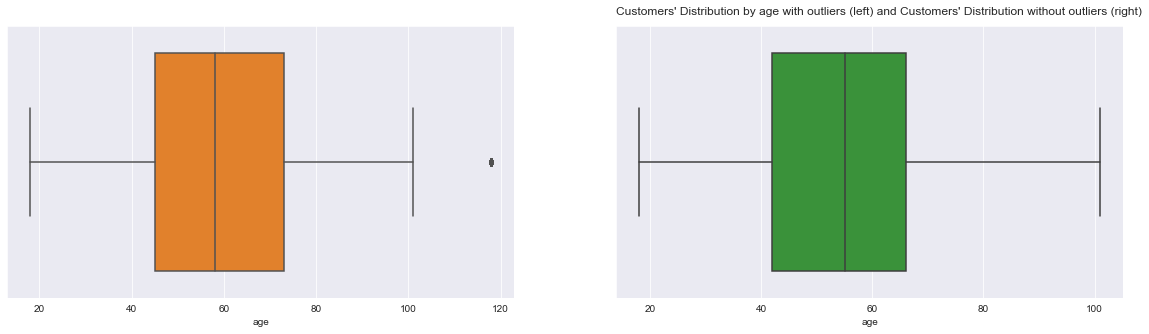

In [46]:
#Plotting the distribution of the customers' age with and without outliers
fig, (ax1, ax2)= plt.subplots(1,2)
warnings.simplefilter(action="ignore", category=FutureWarning)
mpl.rcParams['figure.figsize'] = (10,5)
sns.boxplot(profile['age'], ax=ax1, color='tab:orange')
plt.title("Customers' Distribution by age with outliers (left) and Customers' Distribution without outliers (right)", loc='left', y=1.02)
sns.boxplot(profile1['age'], ax=ax2, color='tab:green')

### <font color=blue>Note:-</font>

- 'gender' and 'income' columns have 2175 null values each 
- both the 'gender' and 'income' column null values matched with the 'age' column having a value of 118
- having 2175 customers aged 118 from 17,000 seems unrealistic which makes this value an outlier 
-    or it could be a typo error entered for customers 18 yrs old but with incomplete information
- since these records with age 118 having missing income & gender values are important details, I decided to drop them
- "became_member_on" column data type will be changed to datetime

- updated profile dataset (profile1) has a total of 14,825 customers
- the customers' age range between 18 and 101 with Median decreasing from 58 to 55 and Mean from 62 to 54 
- the difference between the median & mean on the data with outliers and without outliers show the mean showing higher variance
- the income ranges between 30,000 and 120,000 with Median = 64,000 and Mean = 65,405

#### <font color=blue>(2.1) 'gender'</font> 

In [47]:
#Checking the number of records under the "gender" column
profile1['gender'].count()

14825

In [48]:
#Checking the number of unique "gender" values
print("No. of unique 'gender' values:", profile1['gender'].nunique())
unique_gender = np.sort(profile1.gender.unique())
print("List of unique 'gender' values:", unique_gender)

No. of unique 'gender' values: 3
List of unique 'gender' values: ['F' 'M' 'O']


In [49]:
#Describing the 'gender' column
print(profile1['gender'].value_counts(dropna=False))
profile1['gender'].describe()

M    8484
F    6129
O     212
Name: gender, dtype: int64


count     14825
unique        3
top           M
freq       8484
Name: gender, dtype: object

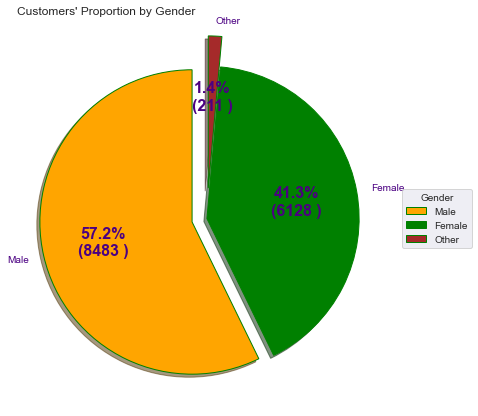

In [50]:
#Plotting the Customers' Proportion by Gender by creating a separate dataset
gender_label = ['Male', 'Female', 'Other']
data = [8484, 6129, 212] # Creating explode data
explode = (0.1, 0.0, 0.2) # Creating color parameters
colors = ( "orange", "green", "brown")
wp = { 'linewidth' : 1, 'edgecolor' : "green" } # Wedge properties
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} )".format(pct, absolute)
# Creating plot
fig, ax = plt.subplots(figsize =(15, 7))
wedges, texts, autotexts = ax.pie(data, autopct = lambda pct: func(pct, data), explode = explode, labels = gender_label, shadow = True, colors = colors, startangle = 90, wedgeprops = wp,textprops = dict(color ="indigo"))
ax.legend(wedges, gender_label, title ="Gender", loc ="center left", bbox_to_anchor =(1, 0, 0.5, 1))
plt.setp(autotexts, size = 16, weight ="bold")
plt.title("Customers' Proportion by Gender", loc='left', y=1.02)
plt.show()

####  <font color=blue>(2.2) 'age'</font> 

In [51]:
#Checking the number of records under the "age" column
profile1['age'].count()

14825

In [52]:
#Extracting dataframe for customers with 118 years of age
print(profile1[profile1['age']==101].head(3))

      gender  age                                id  became_member_on   income
1556       F  101  4d2ccfcbbebf4bd9baf4b7e433d0e288          20171004  43000.0
4100       F  101  d2fdc2be8ab64e4ba04830d441e53fd5          20150526  99000.0
14846      F  101  e0ea90ddd2f147e082d21e97f51ec1b1          20171109  56000.0


In [53]:
#Checking the number of customers in group by specifying 5 bins for each group
pd.cut(profile1['age'], bins=np.linspace(0, 101, 6)).value_counts()

(40.4, 60.6]     5981
(60.6, 80.8]     4556
(20.2, 40.4]     2962
(80.8, 101.0]     986
(0.0, 20.2]       340
Name: age, dtype: int64

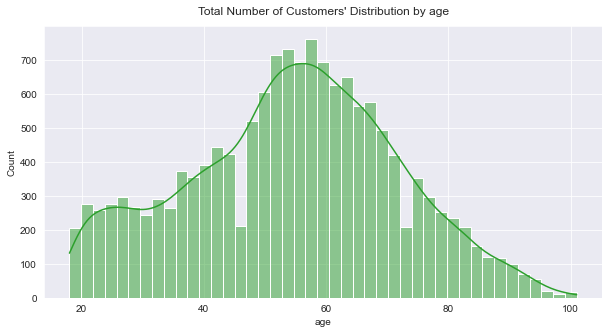

In [54]:
#Plotting the distribution of the Customers' age
plt.figure(figsize=(10,5))
sns.histplot(profile1['age'], kde=True, color='tab:green')
plt.title("Total Number of Customers' Distribution by age", y=1.02)
plt.show()

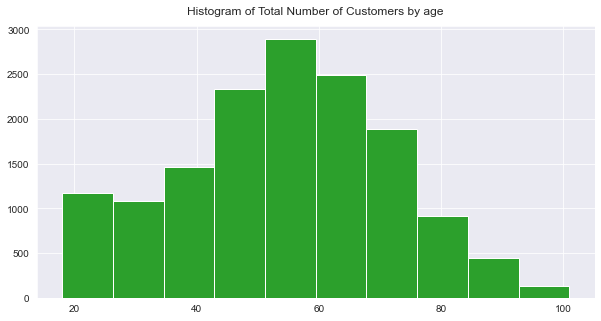

In [55]:
#Plotting the frequency of customers' age in a histogram
fig, ax = plt.subplots(figsize=(10,5))
plt.hist(profile1['age'], bins=10, color='tab:green');
plt.title("Histogram of Total Number of Customers by age", y=1.02)
plt.show()

In [56]:
# Creating bins to specify ranges for age groups
pd.cut(profile1['age'], bins=np.linspace(0, 101,5)).value_counts()

(50.5, 75.75]     7482
(25.25, 50.5]     4681
(75.75, 101.0]    1650
(0.0, 25.25]      1012
Name: age, dtype: int64

In [57]:
#Creating ranges for the customers' age
age_group_labels = ['y_adult_18to25', 'm_adult_26to50','s_adult_51to75','elders_76to101']
age_cut_bins = [0, 25, 50, 75, 101]
profile1['age_group'] = pd.cut(profile1['age'], bins=age_cut_bins, labels=age_group_labels)

<ipython-input-57-2cd0fa6e65b7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profile1['age_group'] = pd.cut(profile1['age'], bins=age_cut_bins, labels=age_group_labels)


In [58]:
#Converting age values from categroical to dummy variables
age_group_range = pd.get_dummies(profile1['age_group'])
profile1 = pd.concat([profile1, age_group_range], axis=1)

In [59]:
profile1.head(3)

,gender,age,id,became_member_on,income,age_group,y_adult_18to25,m_adult_26to50,s_adult_51to75,elders_76to101
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,s_adult_51to75,0,0,1,0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,s_adult_51to75,0,0,1,0
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0,s_adult_51to75,0,0,1,0


In [60]:
#Printing the total number of customers by age group
profile1['age_group'].value_counts()

s_adult_51to75    7482
m_adult_26to50    4681
elders_76to101    1650
y_adult_18to25    1012
Name: age_group, dtype: int64

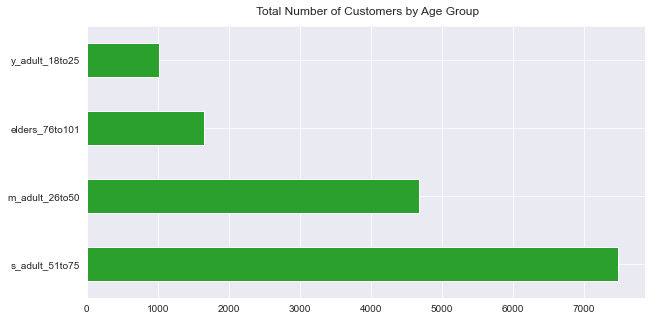

In [61]:
#Plotting the number of cusomers by age_group
profile1['age_group'].value_counts(sort=True).nlargest(4).plot.barh(color='tab:green')
plt.title(" Total Number of Customers by Age Group", y=1.02)
plt.show()

### <font color=blue>Note:-</font> 
- senior adults are the majority of the customers and the young adults have the minimum number of customers.

AGE GROUP DESCRIPTION
- y_adult_18to25  : young adults between age 18 and 25
- m_adult_26to50  : mid-adults between age 26 and 50
- s_adult_51to75  : senior adults between age 51 to 75
- elders_76to101  : elders between age 76 and 101

####  <font color=blue>(2.3) 'id'</font> 

In [62]:
#Renaming the "id" name to customer_id_profile
profile1.rename(columns={'id':'customer_id_profile'},inplace=True)

In [63]:
#Checking the number of unique "id" values in the profile dataframe
print("No. of unique 'id' values in the profile dataset:", profile1['customer_id_profile'].nunique())

No. of unique 'id' values in the profile dataset: 14825


In [64]:
#Checking the 'id' column content (i.e. offer id)
profile1['customer_id_profile'].sample()

7410    8d4554196c5b4a8e84ebfbbfe9d082b9
Name: customer_id_profile, dtype: object

####  <font color=blue>(2.4) 'became_member_on'</font> 

In [65]:
#Checking the null values in "became_member_on" column 
profile1['became_member_on'].isnull().sum()

0

In [66]:
#Checking the "became_member_on" column for the # of unique dates the customers opened rewards account
profile1['became_member_on'].count()

14825

In [67]:
#Change data type of "became_member_on" column to datetime
profile1['became_member_on'] = pd.to_datetime(profile1['became_member_on'], format='%Y%m%d')

In [68]:
#Creating a separate membership year column from the 'became_member_on' column
profile1['year'] = profile1['became_member_on'].dt.year

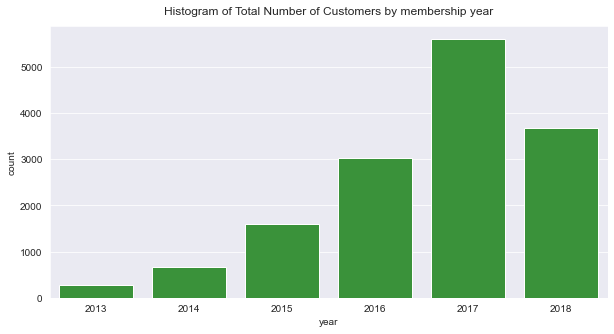

In [69]:
#Plotting the total customers' membership by year 
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='year', data=profile1, color='tab:green')
plt.title("Histogram of Total Number of Customers by membership year", y=1.02)
plt.show()

In [70]:
profile1.groupby('year')['customer_id_profile'].count()

year
2013     274
2014     662
2015    1597
2016    3024
2017    5599
2018    3669
Name: customer_id_profile, dtype: int64

**NOTE:-** The profile raw dataset misses a 6 month data in 2013 and 2018 since the data sets were collected startig July 2013 and ended in July 2018.

In [71]:
#Creating a separate membership month column from the 'became_member_on' column
profile1['month'] = profile1['became_member_on'].dt.month

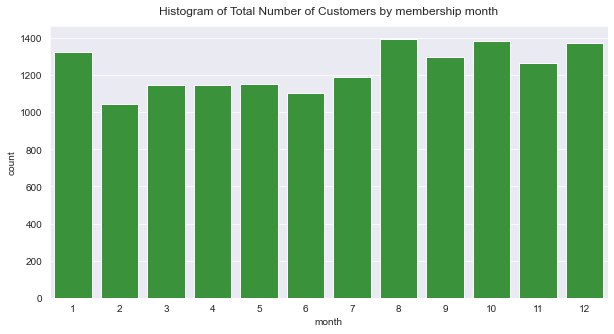

In [72]:
#Plotting the total customers' membership by month
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='month', data=profile1, color='tab:green')
plt.title("Histogram of Total Number of Customers by membership month", y=1.02)
plt.show()

In [73]:
profile1.groupby('month')['customer_id_profile'].count()

month
1     1327
2     1042
3     1145
4     1145
5     1152
6     1105
7     1189
8     1395
9     1299
10    1386
11    1268
12    1372
Name: customer_id_profile, dtype: int64

In [74]:
profile1.head(3)

,gender,age,customer_id_profile,became_member_on,income,age_group,y_adult_18to25,m_adult_26to50,s_adult_51to75,elders_76to101,year,month
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,s_adult_51to75,0,0,1,0,2017,7
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,s_adult_51to75,0,0,1,0,2017,5
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,s_adult_51to75,0,0,1,0,2018,4


### <font color=blue>Note:-</font> 
- 2017 is the year most customers joined the rewards followed by the year 2018 and 2016
- however, 2018 may be the year with the highest since it came in 2nd with only 6 months data
- In general, the membership shows a steady growth since 2013

####  <font color=blue>(2.5) 'income'</font>

In [75]:
#Identifying number of null values in the 'income' column
profile1['income'].isnull().sum()

0

In [76]:
profile1['income'].describe()

count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000
Name: income, dtype: float64

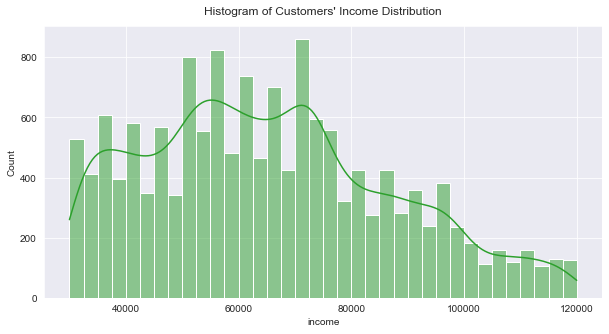

In [77]:
#Plotting the distribution of the Customers' income
sns.histplot(profile1['income'], kde=True, color='tab:green')
plt.title("Histogram of Customers' Income Distribution", y=1.02)
plt.show()

Text(0.5, 1.02, 'Total Income Distributions')

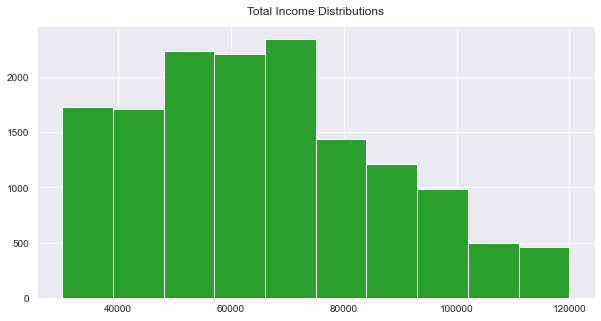

In [78]:
#Plotting the frequency of the Customers' income
profile1['income'].hist(color='tab:green')
plt.title('Total Income Distributions', y=1.02)

### <font color=blue>Note:-</font> 
- Total income ranges from 30,000 up to 120,000
- Mean and Median of the distribution = 65,225 and 64,000 respectively
- The histogram distribution is skewed to the right where the mean is greater than the median but the large values that drove the mean upward didn't affect the middle of the data
- The data set's lower bounds are extremely low relative to the rest of the data which caused the data to skew right.

In [79]:
#Creating bins to specify ranges for income groups
pd.qcut(profile1['income'], q=4).value_counts()

(49000.0, 64000.0]      3863
(29999.999, 49000.0]    3781
(64000.0, 80000.0]      3616
(80000.0, 120000.0]     3565
Name: income, dtype: int64

In [80]:
#Labelling income group with a prefix ig_
income_group_labels = ['ig_29k_49k', 'ig_49k_64k', 'ig_64k_80k', 'ig_80k_120k']
profile1['income_group']= pd.qcut(profile1['income'], q=4,labels=income_group_labels)

In [81]:
profile1.head(3)

,gender,age,customer_id_profile,became_member_on,income,age_group,y_adult_18to25,m_adult_26to50,s_adult_51to75,elders_76to101,year,month,income_group
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,s_adult_51to75,0,0,1,0,2017,7,ig_80k_120k
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,s_adult_51to75,0,0,1,0,2017,5,ig_80k_120k
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,s_adult_51to75,0,0,1,0,2018,4,ig_64k_80k


In [82]:
#Printing the total number of customers by income group
profile1['income_group'].value_counts()

ig_49k_64k     3863
ig_29k_49k     3781
ig_64k_80k     3616
ig_80k_120k    3565
Name: income_group, dtype: int64

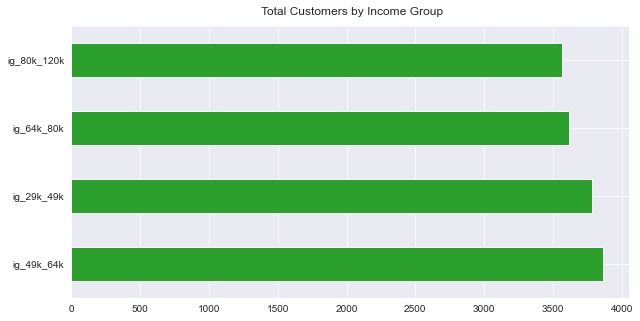

In [83]:
#Plotting total customers by income group
profile1['income_group'].value_counts(sort=True).nlargest(5).plot.barh(color='tab:green')
plt.title(" Total Customers by Income Group", y=1.02)
plt.show()

In [84]:
profile1['income_group'].describe()

count          14825
unique             4
top       ig_49k_64k
freq            3863
Name: income_group, dtype: object

### <font color=blue>Note:-</font> 
- Income group ig_49k_64K and ig_29K_49K are at the top while
- customers with income group ig_80k_120K relatively have the lowest number, however
- the hist plot shows that the customers' income levels didn't significantly affect their participation in the Rewards program

***

### <font color=blue>(3) transcript.csv - exploration, cleansing and data processing</font>

In [85]:
#transcript > Load and inspect the third dataframe
transcript = pd.read_csv('transcript_standard_new1.csv')

In [86]:
transcript.head(3)

,Unnamed: 0,person,event,value,money_spent,offer_id,reward_values,time,response
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,offer id,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0,0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,offer id,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,0
2,2,e2127556f4f64592b11af22de27a7932,offer received,offer id,0.0,2906b810c7d4411798c6938adc9daaa5,0,0,0


In [87]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     306534 non-null  int64  
 1   person         306534 non-null  object 
 2   event          306534 non-null  object 
 3   value          306534 non-null  object 
 4   money_spent    306534 non-null  float64
 5   offer_id       167581 non-null  object 
 6   reward_values  306534 non-null  int64  
 7   time           306534 non-null  int64  
 8   response       306534 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 21.0+ MB


In [88]:
# Remove the Unnamed column that's generaged as index
drop_column3 = ['Unnamed: 0']

In [89]:
transcript = transcript.drop(drop_column3, axis=1)

In [90]:
#Remove duplicates
transcript = transcript.drop_duplicates(keep='first')

In [91]:
#Renaming the "person" name to customer_id_trans
transcript.rename(columns={'person':'customer_id_trans'},inplace=True)

In [92]:
#Renaming the "reward" name to reward_trans
transcript.rename(columns={'reward':'reward_trans'},inplace=True)

In [93]:
#Renaming the "reward_values" name to reward_values_trans
transcript.rename(columns={'reward_values':'reward_values_trans'},inplace=True)

In [94]:
#Renaming the "offer_id" name to offer_id_trans
transcript.rename(columns={'offer_id':'offer_id_trans'},inplace=True)

In [95]:
#Run the revised dataframe
transcript.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306137 entries, 0 to 306533
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   customer_id_trans    306137 non-null  object 
 1   event                306137 non-null  object 
 2   value                306137 non-null  object 
 3   money_spent          306137 non-null  float64
 4   offer_id_trans       167184 non-null  object 
 5   reward_values_trans  306137 non-null  int64  
 6   time                 306137 non-null  int64  
 7   response             306137 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 21.0+ MB


In [96]:
transcript

,customer_id_trans,event,value,money_spent,offer_id_trans,reward_values_trans,time,response
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,offer id,0.00,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0,0
1,a03223e636434f42ac4c3df47e8bac43,offer received,offer id,0.00,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,0
2,e2127556f4f64592b11af22de27a7932,offer received,offer id,0.00,2906b810c7d4411798c6938adc9daaa5,0,0,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,offer id,0.00,fafdcd668e3743c1bb461111dcafc2a4,0,0,0
4,68617ca6246f4fbc85e91a2a49552598,offer received,offer id,0.00,4d5c57ea9a6940dd891ad53e9dbe8da0,0,0,0
...,...,...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,amount,1.59,NaN,0,714,3
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,amount,9.53,NaN,0,714,3
306531,a00058cf10334a308c68e7631c529907,transaction,amount,3.61,NaN,0,714,3
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,amount,3.53,NaN,0,714,3


### <font color=blue>Note:-</font> 
Some 397 duplicate records had been removed from the transcript dataframe

In [97]:
transcript.describe()

,money_spent,reward_values_trans,time,response
count,306137.000000,306137.000000,306137.000000,306137.000000
mean,0.000976,0.531393,366.185015,1.767013
std,0.153188,1.796205,200.348174,1.258893
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,186.000000,1.000000
50%,0.000000,0.000000,408.000000,2.000000
75%,0.000000,0.000000,528.000000,3.000000
max,43.580000,10.000000,714.000000,3.000000


In [98]:
#Create a new 'transcript' dataframe to perform data transformation
transcript1 = transcript.copy(deep=True)
transcript1.head(3)

,customer_id_trans,event,value,money_spent,offer_id_trans,reward_values_trans,time,response
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,offer id,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0,0
1,a03223e636434f42ac4c3df47e8bac43,offer received,offer id,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,0
2,e2127556f4f64592b11af22de27a7932,offer received,offer id,0.0,2906b810c7d4411798c6938adc9daaa5,0,0,0


In [99]:
#Calculating the counts of events by type
transcript1['event'].value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33182
Name: event, dtype: int64

Text(0.5, 1.02, 'Total Number of Event Types')

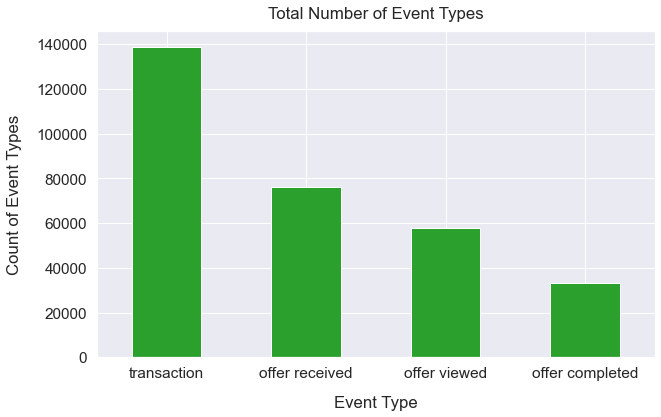

In [100]:
#Plotting the count of unique elements in the "event" column
sns.set(font_scale=1.4)
transcript1['event'].value_counts().plot(kind='bar', figsize=(10,6), rot=0,color='tab:green')
plt.xlabel("Event Type", labelpad=14)
plt.ylabel("Count of Event Types", labelpad=14)
plt.title("Total Number of Event Types", y=1.02)

#profile1['age_group'].value_counts(sort=True).nlargest(4).plot.barh(color='tab:green')
#plt.title(" Total Number of Customers by Age Group")

### View the cleaned dataframes before merging

In [101]:
portfolio1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   reward_portfolio    10 non-null     int64 
 1   channels            10 non-null     object
 2   channel_id          10 non-null     int64 
 3   difficulty          10 non-null     int64 
 4   duration            10 non-null     int64 
 5   offer_type          10 non-null     int64 
 6   offer_type_Name     10 non-null     object
 7   offer_id_portfolio  10 non-null     object
 8   offer_id2           10 non-null     int64 
 9   email_channel       10 non-null     int64 
 10  mobile_channel      10 non-null     int64 
 11  social_channel      10 non-null     int64 
 12  web_channel         10 non-null     int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ KB


In [102]:
profile1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   gender               14825 non-null  object        
 1   age                  14825 non-null  int64         
 2   customer_id_profile  14825 non-null  object        
 3   became_member_on     14825 non-null  datetime64[ns]
 4   income               14825 non-null  float64       
 5   age_group            14825 non-null  category      
 6   y_adult_18to25       14825 non-null  uint8         
 7   m_adult_26to50       14825 non-null  uint8         
 8   s_adult_51to75       14825 non-null  uint8         
 9   elders_76to101       14825 non-null  uint8         
 10  year                 14825 non-null  int64         
 11  month                14825 non-null  int64         
 12  income_group         14825 non-null  category      
dtypes: category(2), datetime64[ns](

In [103]:
transcript1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306137 entries, 0 to 306533
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   customer_id_trans    306137 non-null  object 
 1   event                306137 non-null  object 
 2   value                306137 non-null  object 
 3   money_spent          306137 non-null  float64
 4   offer_id_trans       167184 non-null  object 
 5   reward_values_trans  306137 non-null  int64  
 6   time                 306137 non-null  int64  
 7   response             306137 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 21.0+ MB


### (4)  Merging the Dataframes

In [104]:
master_data = transcript1.merge(portfolio1, left_on='offer_id_trans', right_on='offer_id_portfolio', how='left')

In [105]:
master_data = master_data.merge(profile1, left_on='customer_id_trans', right_on='customer_id_profile', how='left')

In [106]:
master_data

,customer_id_trans,event,value,money_spent,offer_id_trans,reward_values_trans,time,response,reward_portfolio,channels,...,became_member_on,income,age_group,y_adult_18to25,m_adult_26to50,s_adult_51to75,elders_76to101,year,month,income_group
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,offer id,0.00,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0,0,5.0,"['web', 'email', 'mobile']",...,2017-05-09,100000.0,s_adult_51to75,0.0,0.0,1.0,0.0,2017.0,5.0,ig_80k_120k
1,a03223e636434f42ac4c3df47e8bac43,offer received,offer id,0.00,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,0,5.0,"['web', 'email']",...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,offer id,0.00,2906b810c7d4411798c6938adc9daaa5,0,0,0,2.0,"['web', 'email', 'mobile']",...,2018-04-26,70000.0,s_adult_51to75,0.0,0.0,1.0,0.0,2018.0,4.0,ig_64k_80k
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,offer id,0.00,fafdcd668e3743c1bb461111dcafc2a4,0,0,0,2.0,"['web', 'email', 'mobile', 'social']",...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,offer id,0.00,4d5c57ea9a6940dd891ad53e9dbe8da0,0,0,0,10.0,"['web', 'email', 'mobile', 'social']",...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306132,b3a1272bc9904337b331bf348c3e8c17,transaction,amount,1.59,NaN,0,714,3,NaN,NaN,...,2018-01-01,47000.0,s_adult_51to75,0.0,0.0,1.0,0.0,2018.0,1.0,ig_29k_49k
306133,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,amount,9.53,NaN,0,714,3,NaN,NaN,...,2018-04-08,62000.0,s_adult_51to75,0.0,0.0,1.0,0.0,2018.0,4.0,ig_49k_64k
306134,a00058cf10334a308c68e7631c529907,transaction,amount,3.61,NaN,0,714,3,NaN,NaN,...,2013-09-22,52000.0,s_adult_51to75,0.0,0.0,1.0,0.0,2013.0,9.0,ig_49k_64k
306135,76ddbd6576844afe811f1a3c0fbb5bec,transaction,amount,3.53,NaN,0,714,3,NaN,NaN,...,2016-07-09,40000.0,s_adult_51to75,0.0,0.0,1.0,0.0,2016.0,7.0,ig_29k_49k


In [107]:
#master_data.info()

In [108]:
#master_data.isna().sum()

### Insights 
Exploring the merged data revealed that the null values resulted from the missing data that joined the transcript dataset on the right as follows:-

-  45% null values under attributes imported from the transcript data and 11% null values under attributes imported from the profile data were the results of having "transaction" values in the transcipt data in the "event" column.

-  The reward members didn't pay money for 45% of the members' engagement in the transaction events which means - members benefited by getting a refill, product or promo offer that didn't require them to pay money.

-  Additionally, the event showing the reward members who paid insignificant amount of money i.e. only 24 records out of the 306,137 customer transactions showed reward members paid amounts that range between USD 1.19 to USD 43.58.

Therefore, I've decided to remove the transaction values from the event column after conducting the pre-analysis and synthesizing insights on the combined data sets.

In [109]:
master_data.head(2)

,customer_id_trans,event,value,money_spent,offer_id_trans,reward_values_trans,time,response,reward_portfolio,channels,...,became_member_on,income,age_group,y_adult_18to25,m_adult_26to50,s_adult_51to75,elders_76to101,year,month,income_group
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,offer id,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0,0,5.0,"['web', 'email', 'mobile']",...,2017-05-09,100000.0,s_adult_51to75,0.0,0.0,1.0,0.0,2017.0,5.0,ig_80k_120k
1,a03223e636434f42ac4c3df47e8bac43,offer received,offer id,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,0,5.0,"['web', 'email']",...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
master_data = master_data.drop_duplicates(keep='first')

In [111]:
#Dropping rows with null values
master_data = master_data.dropna(how='all', axis=0)

In [112]:
#Checking for null values after removing rows with null values
master_data.isna().sum()

customer_id_trans           0
event                       0
value                       0
money_spent                 0
offer_id_trans         138953
reward_values_trans         0
time                        0
response                    0
reward_portfolio       138953
channels               138953
channel_id             138953
difficulty             138953
duration               138953
offer_type             138953
offer_type_Name        138953
offer_id_portfolio     138953
offer_id2              138953
email_channel          138953
mobile_channel         138953
social_channel         138953
web_channel            138953
gender                  33749
age                     33749
customer_id_profile     33749
became_member_on        33749
income                  33749
age_group               33749
y_adult_18to25          33749
m_adult_26to50          33749
s_adult_51to75          33749
elders_76to101          33749
year                    33749
month                   33749
income_gro

In [113]:
#Converting the dtypes from float to int to avoid decimals
master_data['money_spent'] = master_data['money_spent'].astype(int)
#display(master_data.dtypes)

***

# <font color=green>Pre-analysis Combination Plots from the 3 Dataframes:-</font>

***

###  <font color=green>Portfolio:-</font>

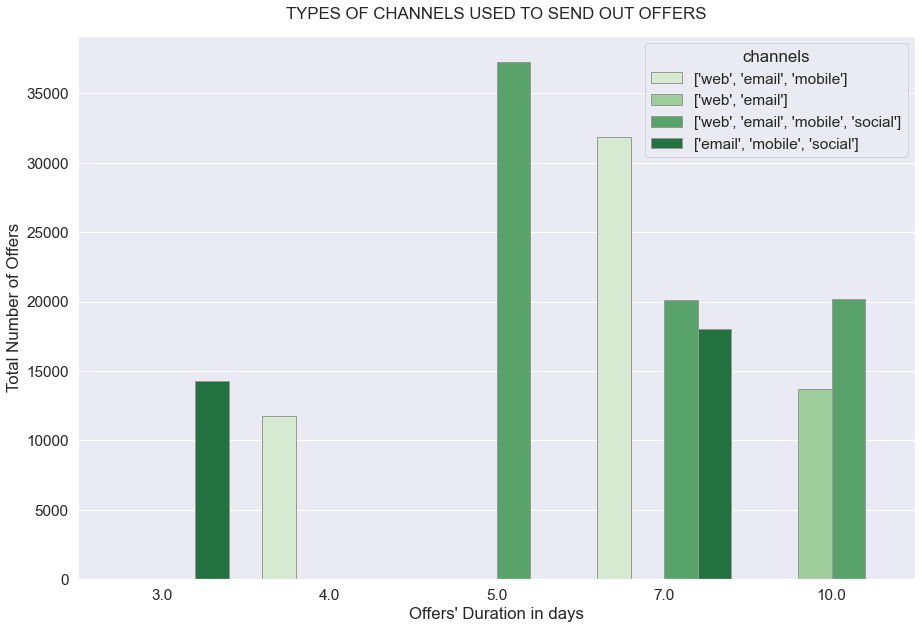

In [114]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x="duration", hue="channels", palette="Greens", edgecolor=".6", data=master_data)
plt.ylabel('Total Number of Offers')
plt.xlabel("Offers' Duration in days")
plt.title("TYPES OF CHANNELS USED TO SEND OUT OFFERS", y=1.02)
plt.show()

**NOTE:-**
-  ['web', 'email', 'mobile', 'social'] - is the most popular channel ID while 5 days is the time mark where most of the offers stayed

Text(0.5, 1.02, 'Channels distribution by rewards')

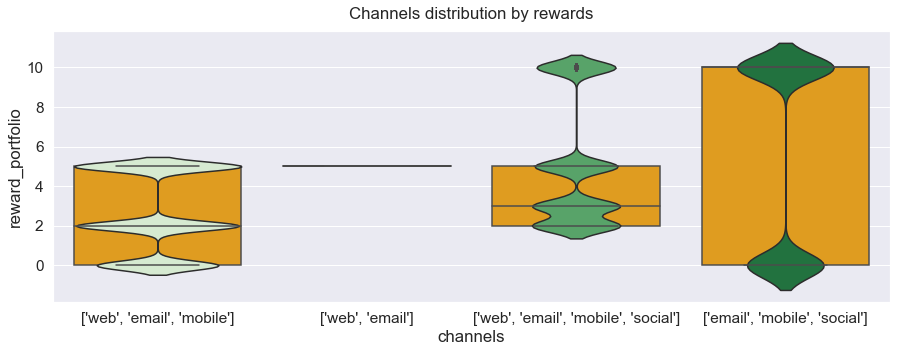

In [115]:
#Plotting the Channels distribution by rewards
plt.figure(figsize=(15,5))
ax = sns.violinplot(x="channels", y="reward_portfolio", palette="Greens", data=master_data,inner=None)
ax = sns.boxplot(x="channels", y="reward_portfolio", data=master_data, color='orange')
plt.title('Channels distribution by rewards', y=1.02 )

**NOTE:-**
-  email, mobile, social - is the most popular channel ID while
-  web, email channel combination is the least popular

Text(0.5, 1.02, 'Difficulty distribution by rewards')

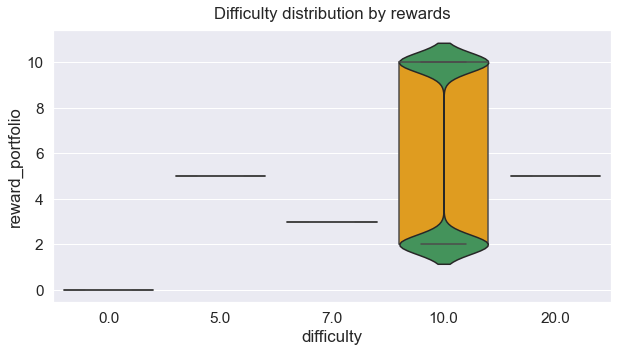

In [116]:
#Plotting the Difficulty distribution by rewards
plt.figure(figsize=(10,5))
ax = sns.violinplot(x="difficulty", y="reward_portfolio", palette="Greens", data=master_data,inner=None, color='tab:blue')
ax = sns.boxplot(x="difficulty", y="reward_portfolio", data=master_data, color='orange')
plt.title('Difficulty distribution by rewards', y=1.02)

**NOTE:-**
-  Difficulty level 10 is the most used offer type factor that gave highest rewards to customers

Text(0.5, 1.02, 'Distribution of Offer Duration by rewards')

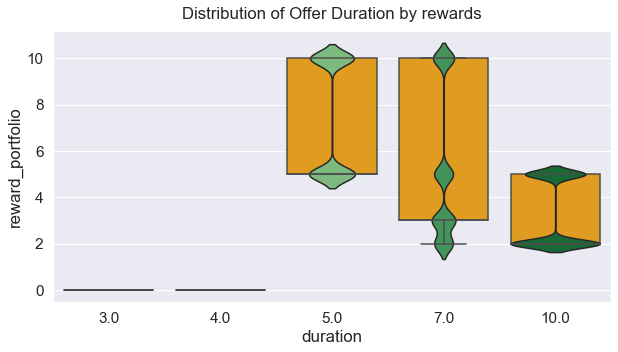

In [117]:
#Plotting the Duration distribution by rewards
plt.figure(figsize=(10,5))
ax = sns.violinplot(x="duration", y="reward_portfolio", palette="Greens", data=master_data,inner=None)
ax = sns.boxplot(x="duration", y="reward_portfolio", data=master_data, color='orange')
plt.title('Distribution of Offer Duration by rewards', y=1.02)

**NOTE:-** 
-  offers with 5 days duration returned customers with the highest mixed types of rewards
-  offers with 7 days duration are the second popular challenge that awarded customers from $2-$10 rewards
-  offers with 10 days duration are the third in line rewarding customers mostly less than $4 in rewards

Text(0.5, 1.02, 'Offer Type distribution by rewards')

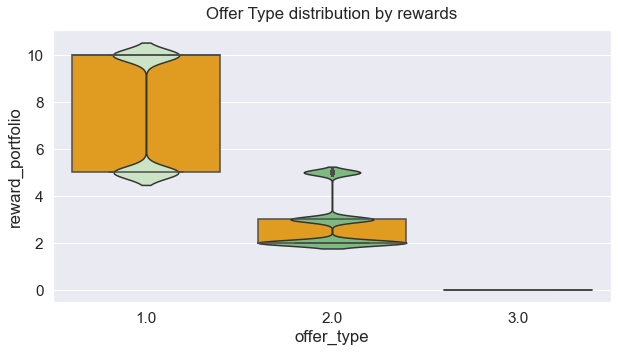

In [118]:
#Plotting the Offer_type distribution by rewards
plt.figure(figsize=(10,5))
ax = sns.violinplot(x="offer_type", y="reward_portfolio", palette="Greens", data=master_data,inner=None)
ax = sns.boxplot(x="offer_type", y="reward_portfolio", data=master_data, color='orange')
plt.title('Offer Type distribution by rewards', y=1.02)

**NOTE:-**
-  offer type 1 - bogo (buy one get one is the most popular offer type that awarded members $5-10 in rewards
-  offer type 2 - discount is the second popular type of offer, however,
-  offer type 3 - informational didn't result in awarding members any rewards

<font color=blue>Note:-</font> 
offer_type code descriptions:-
- 1.0 = bogo
- 2.0 = discount
- 3.0 = informational

### <font color=green>Profile:-</font>

Text(0.5, 1.02, 'Age Group Vs Income Distributions')

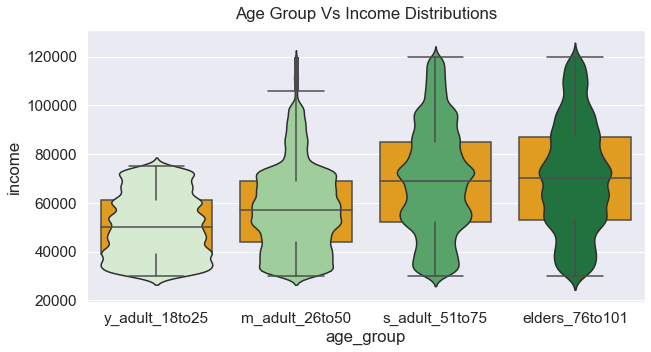

In [119]:
#Plotting the age_group by income distribution
plt.figure(figsize=(10,5))
ax = sns.violinplot(x="age_group", y="income", palette="Greens", data=master_data,inner=None)
ax = sns.boxplot(x="age_group", y="income", data=master_data, color='orange')
plt.title('Age Group Vs Income Distributions', y=1.02)

In [120]:
#Calculating the count of members by the age_group
master_data['age_group'].value_counts()

s_adult_51to75    134165
m_adult_26to50     88787
elders_76to101     29637
y_adult_18to25     19799
Name: age_group, dtype: int64

Text(0.5, 1.02, 'Age Vs Income Distributions by Age Group')

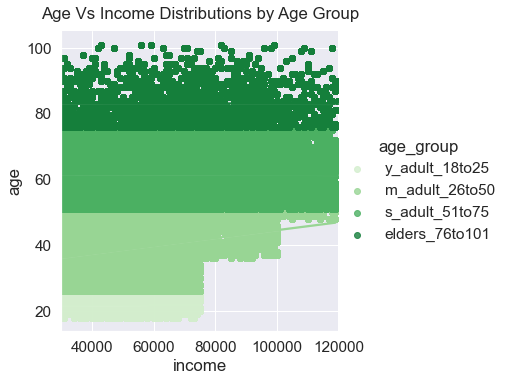

In [121]:
#Plotting the age and income distribution by age_group
sns.lmplot(x="income", y="age", hue='age_group', data=master_data, palette="Greens")
plt.title('Age Vs Income Distributions by Age Group', y=1.02)

Text(0.5, 1.02, 'Income Distribution by Gender')

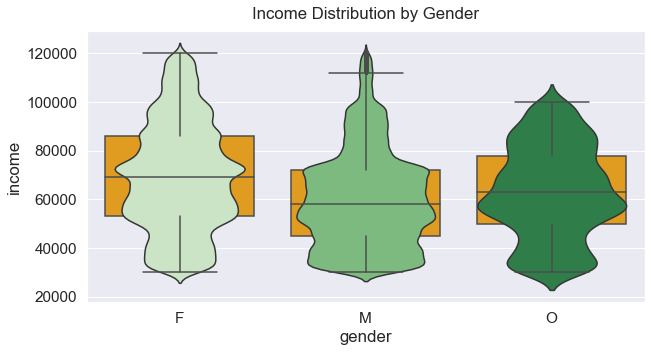

In [122]:
#Plotting the income group distribution by gender
plt.figure(figsize=(10,5))
ax = sns.violinplot(x="gender", y="income", palette="Greens", data=master_data,inner=None)
ax = sns.boxplot(x="gender", y="income", data=master_data, color='orange')
plt.title('Income Distribution by Gender', y=1.02)

Text(0.5, 1.02, 'Membership Year Distributions by Gender')

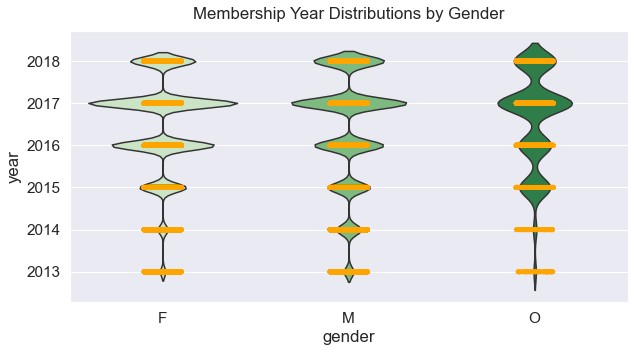

In [123]:
#Plotting the Membership year distribuion by Gender
plt.figure(figsize=(10,5))
ax = sns.violinplot(x="gender", y="year", palette="Greens", data=master_data,inner=None)
ax = sns.stripplot(x="gender", y="year", data=master_data, color='orange')
plt.title('Membership Year Distributions by Gender', y=1.02)

###  <font color=green>Transcript:-</font>

Text(0.5, 1.0, "Duration of Customers' Response")

<Figure size 720x360 with 0 Axes>

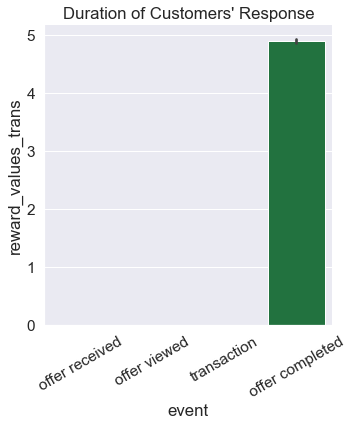

In [124]:
#Plotting event based on customers' response over time
plt.figure(figsize=(10,5))
sns.catplot(x="event", y="reward_values_trans", kind="bar", palette="Greens", data=master_data)
plt.xticks(rotation=30)
plt.title("Duration of Customers' Response")

***

##  <font color=red>Q1) How many customers participated in the Starbucks Rewards program and who're they?</font>

### Plots for describing customers

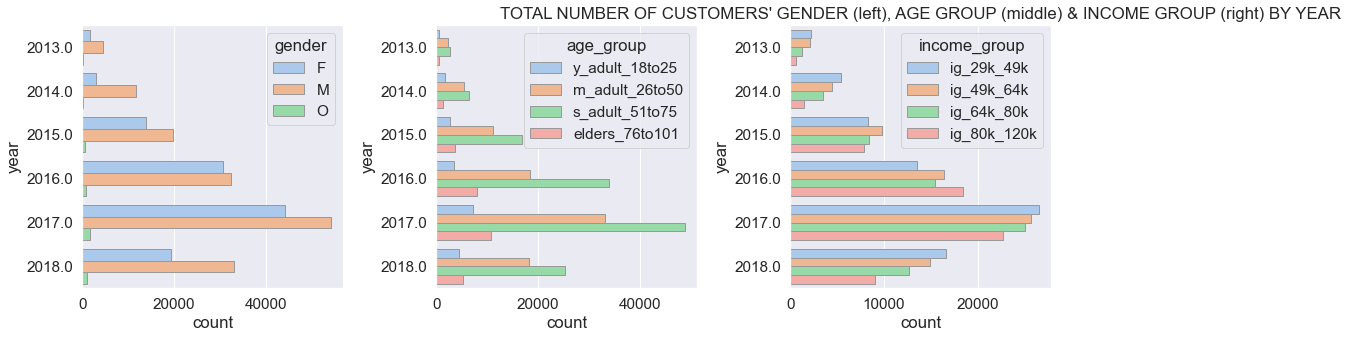

In [125]:
#Plotting total number of customers' gender, age and income by year
fig, (ax0,ax1,ax2) = plt.subplots (1, 3, figsize=(15, 5))
sns.countplot(ax=ax0, y="year", hue="gender", palette="pastel", edgecolor=".6", data=master_data)
sns.countplot(ax=ax1, y="year", hue="age_group", palette="pastel", edgecolor=".6", data=master_data)
sns.countplot(ax=ax2, y="year", hue="income_group", palette="pastel", edgecolor=".6", data=master_data)
plt.title("TOTAL NUMBER OF CUSTOMERS' GENDER (left), AGE GROUP (middle) & INCOME GROUP (right) BY YEAR")
plt.tight_layout()
plt.show()

### Plots for issues affecting the customers' response

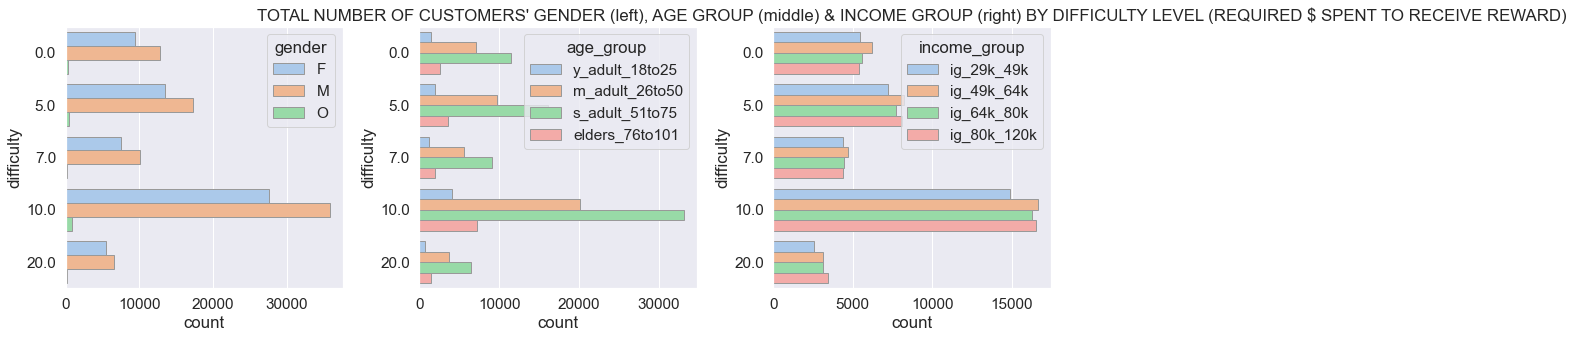

In [126]:
#Plotting difficulty by gender, age and income
fig, (ax0,ax1,ax2) = plt.subplots (1, 3, figsize=(15, 5))
sns.countplot(ax=ax0, y="difficulty", hue="gender", palette="pastel", edgecolor=".6", data=master_data)
sns.countplot(ax=ax1, y="difficulty", hue="age_group", palette="pastel", edgecolor=".6", data=master_data)
sns.countplot(ax=ax2, y="difficulty", hue="income_group", palette="pastel", edgecolor=".6", data=master_data)
plt.title("TOTAL NUMBER OF CUSTOMERS' GENDER (left), AGE GROUP (middle) & INCOME GROUP (right) BY DIFFICULTY LEVEL (REQUIRED $ SPENT TO RECEIVE REWARD)")
plt.tight_layout()
plt.show()

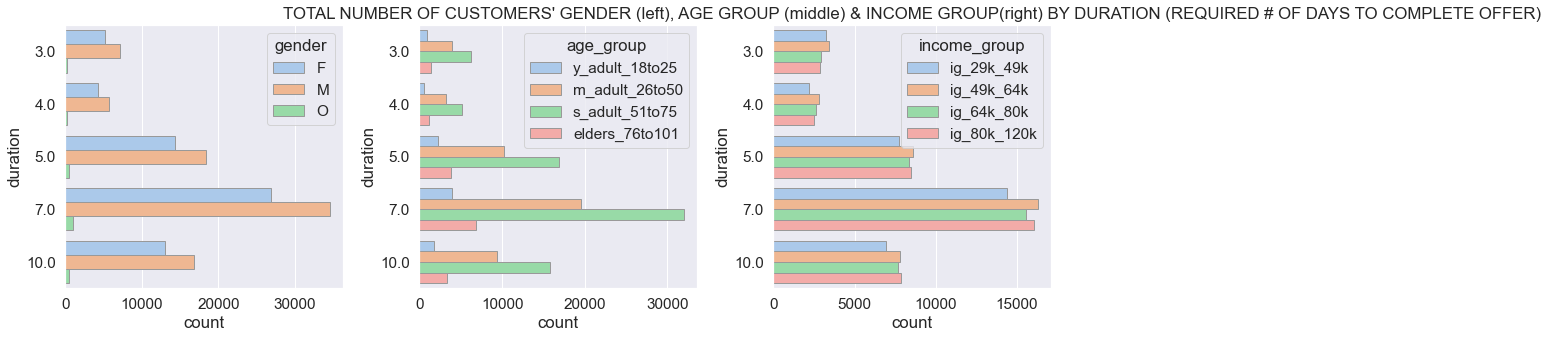

In [127]:
#Plotting offer duration by gender, age_group and income_group
fig, (ax0,ax1,ax2) = plt.subplots (1, 3, figsize=(15, 5))
sns.countplot(ax=ax0, y="duration", hue="gender", palette="pastel", edgecolor=".6", data=master_data)
sns.countplot(ax=ax1, y="duration", hue="age_group", palette="pastel", edgecolor=".6", data=master_data)
sns.countplot(ax=ax2, y="duration", hue="income_group", palette="pastel", edgecolor=".6", data=master_data)
plt.title("TOTAL NUMBER OF CUSTOMERS' GENDER (left), AGE GROUP (middle) & INCOME GROUP(right) BY DURATION (REQUIRED # OF DAYS TO COMPLETE OFFER)")
plt.tight_layout()
plt.show()

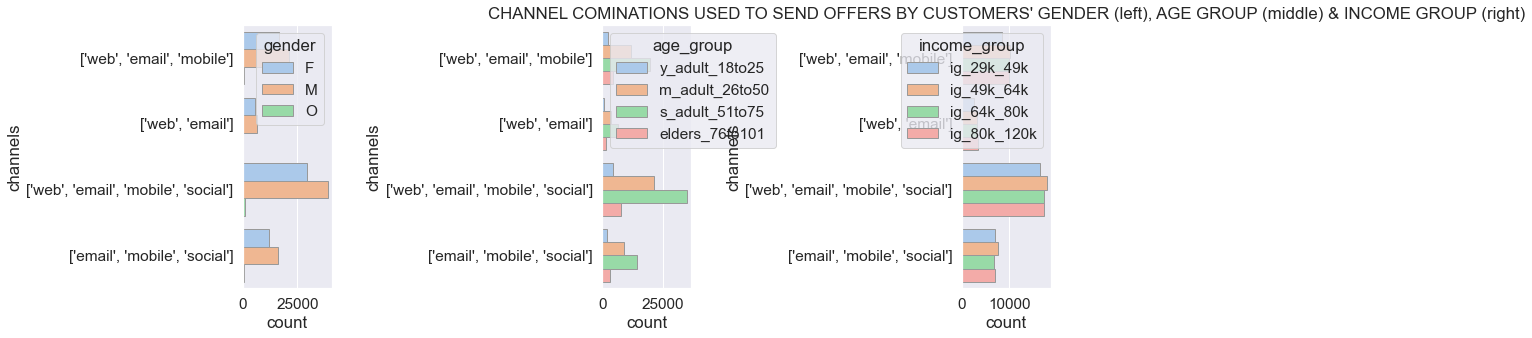

In [128]:
#Plotting channels by gender, age and income
fig, (ax0,ax1,ax2) = plt.subplots (1, 3, figsize=(15, 5))
sns.countplot(ax=ax0, y="channels", hue="gender", palette="pastel", edgecolor=".6", data=master_data)
sns.countplot(ax=ax1, y="channels", hue="age_group", palette="pastel", edgecolor=".6", data=master_data)
sns.countplot(ax=ax2, y="channels", hue="income_group", palette="pastel", edgecolor=".6", data=master_data)
plt.title("CHANNEL COMINATIONS USED TO SEND OFFERS BY CUSTOMERS' GENDER (left), AGE GROUP (middle) & INCOME GROUP (right)")
plt.tight_layout()
plt.show()

### Plots for customers' response related outcomes

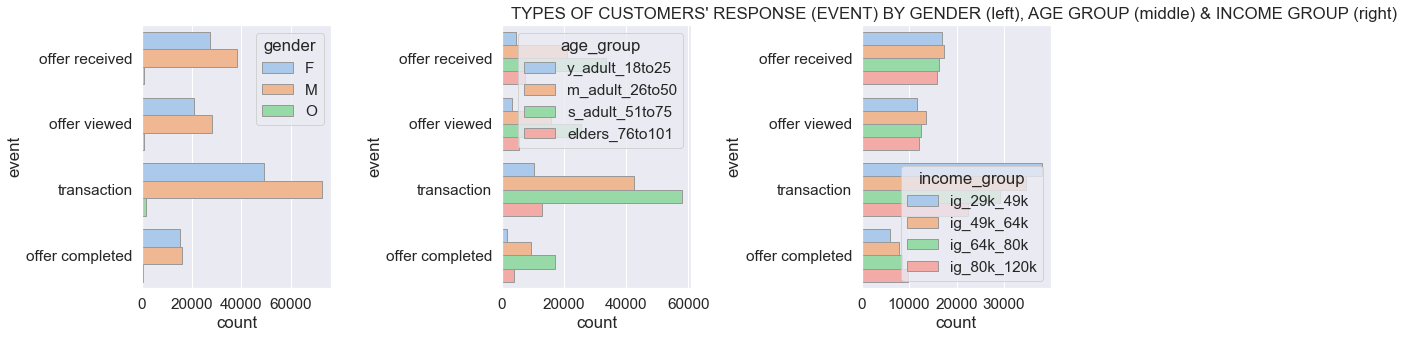

In [129]:
#Plotting event by gender, age and income
fig, (ax0,ax1,ax2) = plt.subplots (1, 3, figsize=(15, 5))
sns.countplot(ax=ax0, y="event", hue="gender", palette="pastel", edgecolor=".6", data=master_data)
sns.countplot(ax=ax1, y="event", hue="age_group",  palette="pastel", edgecolor=".6", data=master_data)
sns.countplot(ax=ax2, y="event", hue="income_group", palette="pastel", edgecolor=".6", data=master_data)
plt.title("TYPES OF CUSTOMERS' RESPONSE (EVENT) BY GENDER (left), AGE GROUP (middle) & INCOME GROUP (right) ")
plt.tight_layout()
plt.show()

***

***

## <font color=red>Q2) Which promo offer sold the most?</font>

### Plots for Popular offer types by customers

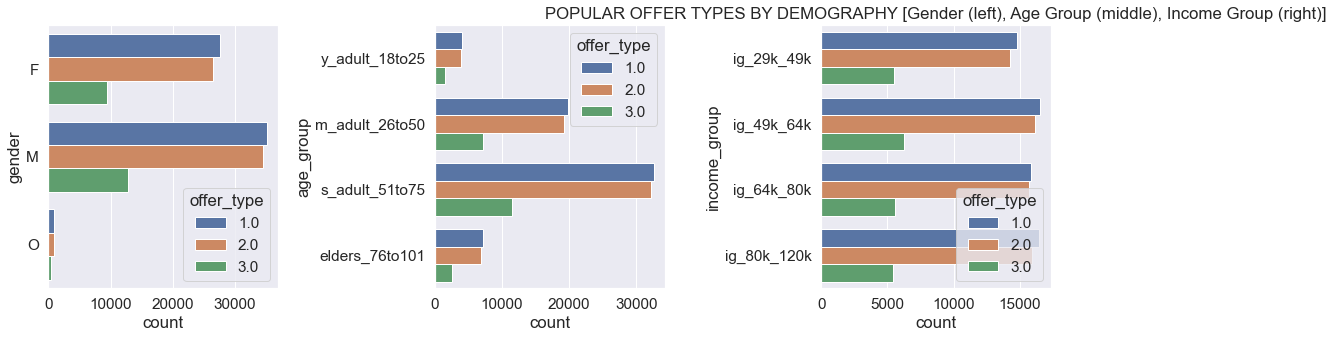

In [130]:
#Plotting the total number of popular offer types by demography
fig, (ax0,ax1,ax2) = plt.subplots (1, 3, figsize=(15, 5))
sns.countplot(ax=ax0, y="gender", hue="offer_type", data=master_data)
sns.countplot(ax=ax1, y="age_group", hue="offer_type", data=master_data)
sns.countplot(ax=ax2, y="income_group", hue="offer_type", data=master_data)
plt.title("POPULAR OFFER TYPES BY DEMOGRAPHY [Gender (left), Age Group (middle), Income Group (right)]")
plt.tight_layout()

### Plots for Popular Responses to Offers by Customers

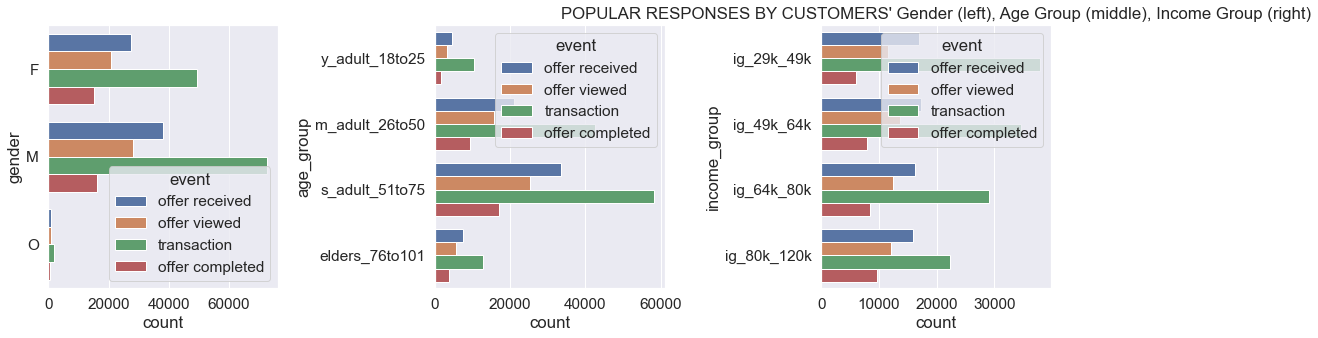

In [131]:
#Plotting the total number of popular responses (events) by demography
fig, (ax0,ax1,ax2) = plt.subplots (1, 3, figsize=(15, 5))
sns.countplot(ax=ax0, y="gender", hue="event", data=master_data)
sns.countplot(ax=ax1, y="age_group", hue="event", data=master_data)
sns.countplot(ax=ax2, y="income_group", hue="event", data=master_data)
plt.title("POPULAR RESPONSES BY CUSTOMERS' Gender (left), Age Group (middle), Income Group (right)")
plt.tight_layout()

***

## <font color=red>Q3) What is the correlation of the customers' responses in regards to the predictive variables from the combined datasets?</font>

In [132]:
#Copy the master_data merged dataframe to create correlation matrix
master_data1 = master_data.copy(deep=True)

In [133]:
master_data1.columns

Index(['customer_id_trans', 'event', 'value', 'money_spent', 'offer_id_trans',
       'reward_values_trans', 'time', 'response', 'reward_portfolio',
       'channels', 'channel_id', 'difficulty', 'duration', 'offer_type',
       'offer_type_Name', 'offer_id_portfolio', 'offer_id2', 'email_channel',
       'mobile_channel', 'social_channel', 'web_channel', 'gender', 'age',
       'customer_id_profile', 'became_member_on', 'income', 'age_group',
       'y_adult_18to25', 'm_adult_26to50', 's_adult_51to75', 'elders_76to101',
       'year', 'month', 'income_group'],
      dtype='object')

In [134]:
#Creating a classification bins for numerical income_range attributes
master_data1['income_range'] = pd.cut(master_data1['income'], bins=[29999, 49001, 64001, 80001, 120001],labels=['lower_middle', 'middle', 'upper_middle', 'high'])

In [135]:
#Replacing the 'income_range' categorical labels with numerical labels
income_range_cat = master_data1['income_range'].astype('category').cat.categories.tolist()
income_range_new = {'income_range' : {k: v for k,v in zip(income_range_cat,list(range(1,len(income_range_cat)+1)))}}

In [136]:
#Checking the new income_range categorical column
income_range_new

{'income_range': {'lower_middle': 1,
  'middle': 2,
  'upper_middle': 3,
  'high': 4}}

In [137]:
#Replacing the categorical labels in the 'income_range' column with numerical labels
master_data1.replace(income_range_new, inplace=True)

In [138]:
#Checking the unique values in the 'event' column
master_data1['event'].unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

In [139]:
#Removing all values=transactions from the 'event' column since it has no offer Id attached to it '\n' and merged datas on the right are empty
master_data1 = master_data1[master_data1['event'] != 'transaction']

In [140]:
master_data1['event'].unique()

array(['offer received', 'offer viewed', 'offer completed'], dtype=object)

In [141]:
master_data1.head(3)

,customer_id_trans,event,value,money_spent,offer_id_trans,reward_values_trans,time,response,reward_portfolio,channels,...,income,age_group,y_adult_18to25,m_adult_26to50,s_adult_51to75,elders_76to101,year,month,income_group,income_range
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,offer id,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0,0,5.0,"['web', 'email', 'mobile']",...,100000.0,s_adult_51to75,0.0,0.0,1.0,0.0,2017.0,5.0,ig_80k_120k,4.0
1,a03223e636434f42ac4c3df47e8bac43,offer received,offer id,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,0,5.0,"['web', 'email']",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,offer id,0,2906b810c7d4411798c6938adc9daaa5,0,0,0,2.0,"['web', 'email', 'mobile']",...,70000.0,s_adult_51to75,0.0,0.0,1.0,0.0,2018.0,4.0,ig_64k_80k,3.0


In [142]:
#master_data1.info()

In [143]:
#Checking the unique values in the "age" column  
master_data1['age'].unique()

array([ 75.,  nan,  68.,  65.,  58.,  61.,  62.,  64.,  78.,  88.,  42.,
        56.,  59.,  22.,  96.,  40.,  69.,  26.,  20.,  45.,  54.,  39.,
        79.,  66.,  48.,  37.,  73.,  44.,  63.,  27.,  67.,  76.,  53.,
        74.,  38.,  70.,  49.,  50.,  90.,  19.,  72.,  52.,  55.,  57.,
        18.,  51.,  71.,  83.,  29.,  25.,  77.,  47.,  60.,  36.,  46.,
        81.,  24.,  34.,  89.,  41.,  30.,  32.,  85.,  23., 100.,  43.,
        82.,  28.,  35.,  80.,  84.,  87.,  86.,  94.,  33.,  95.,  31.,
        93.,  92.,  21.,  98.,  91., 101.,  97.,  99.])

In [144]:
#Create a dataframe with numerical columns for the independent variables
master_data_num = master_data1.loc[:, ('offer_type', 'channel_id', 'difficulty', 'duration',  'income_range', 'reward_values_trans', 'response', 'year')]

In [145]:
master_data_num.head(3)

,offer_type,channel_id,difficulty,duration,income_range,reward_values_trans,response,year
0,1.0,3.0,5.0,7.0,4.0,0,0,2017.0
1,2.0,4.0,20.0,10.0,NaN,0,0,NaN
2,2.0,3.0,10.0,7.0,3.0,0,0,2018.0


In [146]:
master_data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167184 entries, 0 to 306130
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   offer_type           167184 non-null  float64
 1   channel_id           167184 non-null  float64
 2   difficulty           167184 non-null  float64
 3   duration             167184 non-null  float64
 4   income_range         148431 non-null  float64
 5   reward_values_trans  167184 non-null  int64  
 6   response             167184 non-null  int64  
 7   year                 148431 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 11.5 MB


In [147]:
#Filling the null values by 0 
master_data_num = master_data_num.fillna(0)

In [148]:
master_data_num['year'] = master_data_num['year'].astype(int)

In [149]:
#Add a new column "years_of_membership" to calculate Customers' length of membership
master_data_num['present_year'] = 2021
master_data_num.head(3)

,offer_type,channel_id,difficulty,duration,income_range,reward_values_trans,response,year,present_year
0,1.0,3.0,5.0,7.0,4.0,0,0,2017,2021
1,2.0,4.0,20.0,10.0,0.0,0,0,0,2021
2,2.0,3.0,10.0,7.0,3.0,0,0,2018,2021


In [150]:
master_data_num['years_of_membership'] = master_data_num['present_year'] - master_data_num['year']
master_data_num.head()

,offer_type,channel_id,difficulty,duration,income_range,reward_values_trans,response,year,present_year,years_of_membership
0,1.0,3.0,5.0,7.0,4.0,0,0,2017,2021,4
1,2.0,4.0,20.0,10.0,0.0,0,0,0,2021,2021
2,2.0,3.0,10.0,7.0,3.0,0,0,2018,2021,3
3,2.0,2.0,10.0,10.0,0.0,0,0,0,2021,2021
4,1.0,2.0,10.0,5.0,0.0,0,0,0,2021,2021


In [151]:
master_data_num.replace(to_replace=2021, value=0, inplace=True)

In [152]:
master_data_num['years_of_membership'].unique()

array([4, 0, 3, 5, 8, 6, 7], dtype=int64)

In [153]:
#Removing all values=0 from the 'years_of_membership' column  
master_data_num = master_data_num [master_data_num['years_of_membership'] != 0]

In [154]:
master_data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148431 entries, 0 to 306130
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   offer_type           148431 non-null  float64
 1   channel_id           148431 non-null  float64
 2   difficulty           148431 non-null  float64
 3   duration             148431 non-null  float64
 4   income_range         148431 non-null  float64
 5   reward_values_trans  148431 non-null  int64  
 6   response             148431 non-null  int64  
 7   year                 148431 non-null  int32  
 8   present_year         148431 non-null  int64  
 9   years_of_membership  148431 non-null  int64  
dtypes: float64(5), int32(1), int64(4)
memory usage: 11.9 MB


In [155]:
#drop the present the 'year' and 'present_year' columns
master_data_num.drop(['year', 'present_year'], axis=1, inplace=True)
master_data_num.head(3)

,offer_type,channel_id,difficulty,duration,income_range,reward_values_trans,response,years_of_membership
0,1.0,3.0,5.0,7.0,4.0,0,0,4
2,2.0,3.0,10.0,7.0,3.0,0,0,3
5,1.0,2.0,5.0,5.0,2.0,0,0,3


In [156]:
#Checking the removal of the '0' from "years_of_membership" column
master_data_num['years_of_membership'].unique()

array([4, 3, 5, 8, 6, 7], dtype=int64)

In [157]:
#Re-arranging the columns to have 'customer_id' column the first column in dataset
master_data_num = master_data_num.reindex(columns=['offer_type', 'channel_id', 'difficulty', 'duration', 'income_range',
       'reward_values_trans', 'years_of_membership', 'response', 'zscore_response'])

In [158]:
master_data_num.describe()

,offer_type,channel_id,difficulty,duration,income_range,reward_values_trans,years_of_membership,response,zscore_response
count,148431.000000,148431.000000,148431.000000,148431.000000,148431.000000,148431.000000,148431.000000,148431.000000,0.0
mean,1.723670,2.230477,7.883205,6.622498,2.526790,1.068712,4.423490,0.768034,NaN
std,0.710846,0.853901,5.038865,2.133171,1.106397,2.443026,1.186675,0.781206,NaN
min,1.000000,1.000000,0.000000,3.000000,1.000000,0.000000,3.000000,0.000000,NaN
25%,1.000000,2.000000,5.000000,5.000000,2.000000,0.000000,4.000000,0.000000,NaN
50%,2.000000,2.000000,10.000000,7.000000,3.000000,0.000000,4.000000,1.000000,NaN
75%,2.000000,3.000000,10.000000,7.000000,4.000000,0.000000,5.000000,1.000000,NaN
max,3.000000,4.000000,20.000000,10.000000,4.000000,10.000000,8.000000,2.000000,NaN


In [159]:
#Conducting the outlier analysis in the correlation dataset using Zscore
master_data_num['zscore_response'] = zscore(master_data_num.response)
master_data_num[(master_data_num.zscore_response > 3.0) | (master_data_num.zscore_response < -3.0)]

,offer_type,channel_id,difficulty,duration,income_range,reward_values_trans,years_of_membership,response,zscore_response


{'whiskers': [<matplotlib.lines.Line2D at 0x1f546a9b640>,
 'caps': [<matplotlib.lines.Line2D at 0x1f546a9bd00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f546a9b2e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f546a89400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f546a89760>],
 'means': []}

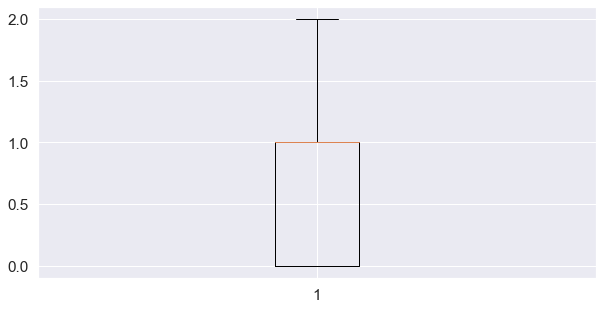

In [160]:
#Plotting a boxplot to visualize the outliers for the 'response' column i.e. the dependent variable
plt.boxplot(master_data_num['response'])

### INSIGHTS

The below listed independent variables generated from the cleaned dataset i.e. master_data_num which generated from the portfolio , profile and transcript data sets of the Starbucks Rewards Program have direct relationship with the dependent variable "response". The attributes are:

-  'offer_type', 'channel_id', 'difficulty', 'duration',  'income_range', 'reward_values_trans', 'years_of_membership'.

-  The above boxplot shows that there are **no outliers** in the 'response' column where the the standard deviation is close to 0 so the 'response' column values don't show variations, the mean, median and the 3rd quartile are the same, whereas the minimum and the 1st quartile are the same

-  response values were created after the "events" column with values representing **0=offer_received; 1=offer_viewed; 2=offer_completed**

In [161]:
corr_matrix = master_data_num.corr()

In [162]:
corr_matrix

,offer_type,channel_id,difficulty,duration,income_range,reward_values_trans,years_of_membership,response,zscore_response
offer_type,1.000000,0.099275,-0.295299,-0.131751,-0.013313,-0.256398,-0.006454,-0.138031,-0.138031
channel_id,0.099275,1.000000,0.421907,0.392163,0.030461,-0.035899,0.011020,-0.011659,-0.011659
difficulty,-0.295299,0.421907,1.000000,0.766786,0.026297,0.137966,0.008335,0.096821,0.096821
duration,-0.131751,0.392163,0.766786,1.000000,0.016290,0.042474,0.013790,0.120591,0.120591
income_range,-0.013313,0.030461,0.026297,0.016290,1.000000,0.079108,0.027142,0.068344,0.068344
reward_values_trans,-0.256398,-0.035899,0.137966,0.042474,0.079108,1.000000,0.049036,0.689873,0.689873
years_of_membership,-0.006454,0.011020,0.008335,0.013790,0.027142,0.049036,1.000000,0.056992,0.056992
response,-0.138031,-0.011659,0.096821,0.120591,0.068344,0.689873,0.056992,1.000000,1.000000
zscore_response,-0.138031,-0.011659,0.096821,0.120591,0.068344,0.689873,0.056992,1.000000,1.000000


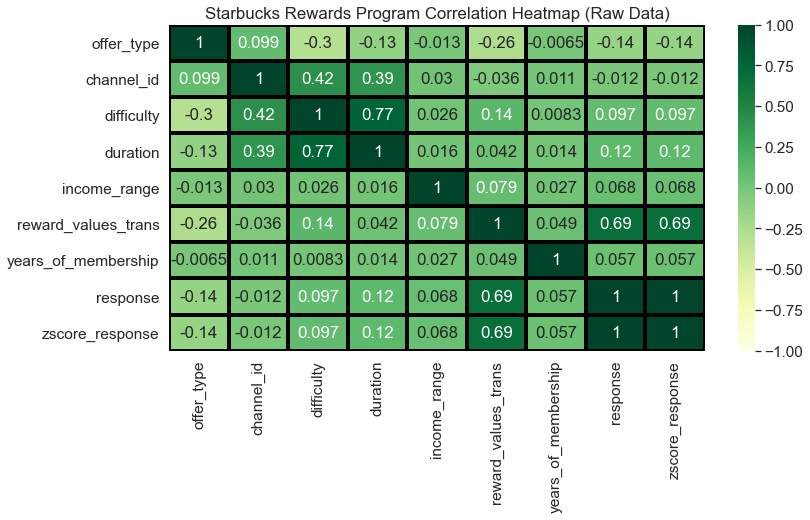

In [163]:
#Plot the heatmap for the correlation matrix 
plt.subplots(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, center= 0, cmap= 'YlGn', linewidths=3, linecolor='black')
#heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=90)
plt.title('Starbucks Rewards Program Correlation Heatmap (Raw Data)')
plt.show()

### INSIGHTS
The correlation matrix didn't show the attributes having very strong correlation. However, the following attributes have stronger correlations:

-  channel_id, difficulty, duration, income_range, reward_value, response and years_of_membership.
-  the regression model will further reveal the significance of these attributes in predicting getting strong positive correlations of the predictive values agains the observed values.

***

##  <font color=red>Q4) What portfolio attributes affect the customers' response in completing offers and making future transactions?</font>

### Create Regression Equations Using OLS Regression Model

In [164]:
#Creating "Train and Test Data" by assigning independent variables to X and dependent variable to Y
X = master_data_num.loc[:, ('offer_type', 'channel_id', 'difficulty', 'duration',  'income_range', 'reward_values_trans', 'years_of_membership')]
Y = master_data_num.loc[:, ('response')]
#Add Constant
X = sm.add_constant(X)
Y = Y

In [165]:
#Splitting the data into train and test function
#Import train_test_split from sklearn.model_selection
train_X, test_X, train_Y, test_Y = train_test_split(X,Y, train_size=0.8, random_state=100)

In [166]:
#Creating the Model using the OLS (Ordinary Least Square) Method
model_one = sm.OLS(train_Y,train_X).fit()
model_one.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                 1.677e+04
Date:                Sat, 10 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:59:10   Log-Likelihood:                -98390.
No. Observations:              118744   AIC:                         1.968e+05
Df Residuals:                  118736   BIC:                         1.969e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0743      0.010      7.365      0.000       0.055       0.094
offer_type              0.0318      0.003     12.591      0.000       0.027       0.037
channel_id             -0.0099      0.002     -4.603      0.000      -0.014      -0.006
difficulty             -0.0241      0.001    -44.109      0.000      -0.025      -0.023
duration                0.0797      0.001     66.591      0.000       0.077       0.082
income_range            0.0094      0.001      6.457      0.000       0.007       0.012
reward_values_trans     0.2263      0.001    328.699      0.000       0.225       0.228
years_of_membership     0.0128      0.001      9.439      0.000       0.010       0.015
==============================================================================
Omnibus:                   575429.151   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13027.692
Skew:                           0.110   Prob(JB):                         0.00
Kurtosis:                       1.392   Cond. No.                         80.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [167]:
#Creating a second Model selecting significant variables from X by creating a new variable X1
X1 = ['offer_type', 'channel_id', 'difficulty', 'duration',  'income_range', 'reward_values_trans', 'years_of_membership']

#Fitting the new significant variables into the model again
train_X = train_X[X1]
model_two = sm.OLS(train_Y,train_X).fit()
model_two.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               response   R-squared (uncentered):                   0.744
Model:                            OLS   Adj. R-squared (uncentered):              0.744
Method:                 Least Squares   F-statistic:                          4.923e+04
Date:                Sat, 10 Jul 2021   Prob (F-statistic):                        0.00
Time:                        20:59:10   Log-Likelihood:                         -98417.
No. Observations:              118744   AIC:                                  1.968e+05
Df Residuals:                  118737   BIC:                                  1.969e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
offer_type              0.0388      0.002     16.634      0.000       0.034       0.043
channel_id             -0.0070      0.002     -3.282      0.001      -0.011      -0.003
difficulty             -0.0246      0.001    -45.427      0.000      -0.026      -0.024
duration                0.0831      0.001     75.374      0.000       0.081       0.085
income_range            0.0129      0.001      9.396      0.000       0.010       0.016
reward_values_trans     0.2269      0.001    332.395      0.000       0.226       0.228
years_of_membership     0.0186      0.001     16.642      0.000       0.016       0.021
==============================================================================
Omnibus:                   579165.172   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12936.181
Skew:                           0.105   Prob(JB):                         0.00
Kurtosis:                       1.397   Cond. No.                         20.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 576x288 with 0 Axes>

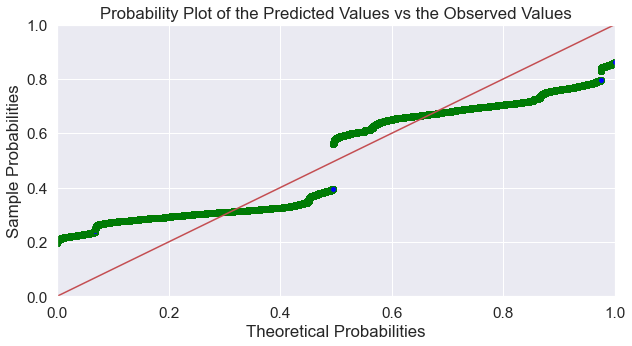

In [168]:
#Validating the second model using the "Normal Distribution of Residuals" Method
#Plot a probability plot
probplot = sm.ProbPlot(model_two.resid)
plt.figure(figsize=(8,4))
probplot.ppplot(line='45', color='green')
plt.title("Probability Plot of the Predicted Values vs the Observed Values")
plt.show()

Notes:
The second model has improved R2 of 74% and p-value < 0.05 which shows that 74% of the data fit the regression model. However, the model validation shows that there is room for improvement because the differences between the observations and the predicted values overlap and break. 

### Insights
The above residual probability plot shows that the green line (actual values) against the predicted values (red line) where:

-  The predicted data set values show smaller difference and overlaps with the observed values where the model is doing well
-  The observed values (green lines) break may show where values in the model are not doing well which leads to a conclusion that another modeling approach may be used to improve predicted values.

Text(0.5, 1.0, "Regressive Coefficients for Customers' Response")

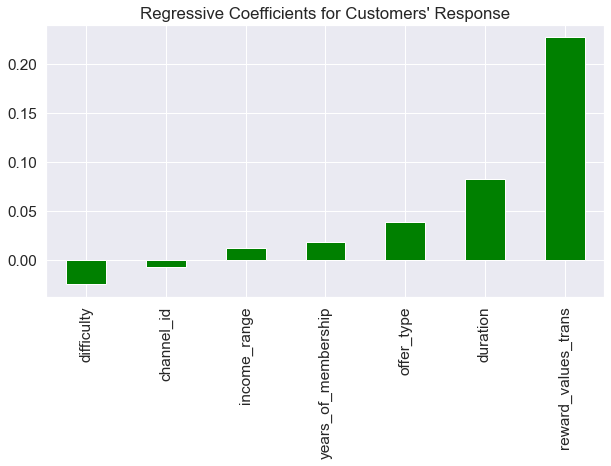

In [169]:
#Extracting the coefficients from the regression models using .params method
model_two.params.sort_values(ascending=True).plot(kind='bar', color='green')
plt.title("Regressive Coefficients for Customers' Response")

### Insights 

Having the rewards value showing strong relationship to the dependent variable "response" is very good because the end goal of Starbuck's rewards program is 

-  'reward_values', 'duration' and 'offer_type' have strong positive relationship with response followed by years_of_membership and members' income range 
-  'difficulty' is inversely related to response

In [170]:
#Creating predictions
predict = model_two.predict(test_X[X1])
predict

173916    0.417728
156067    0.786380
171397    0.489362
11535     0.455036
31987     1.241531
            ...   
59146     0.404781
212530    0.743657
73850     0.717762
10021     0.339194
16038     0.510707
Length: 29687, dtype: float64

In [171]:
#Measuring the RMSE (Root Mean Square Error)
#from sklearn import metrics
np.sqrt(metrics.mean_squared_error(predict,test_Y))

0.5539276034887062

**NOTE:-** On average, the predicted values are 0.55 RMSE apart from the observed values.
- This indicates that the model can be further improved by applying other significant independent attributes.

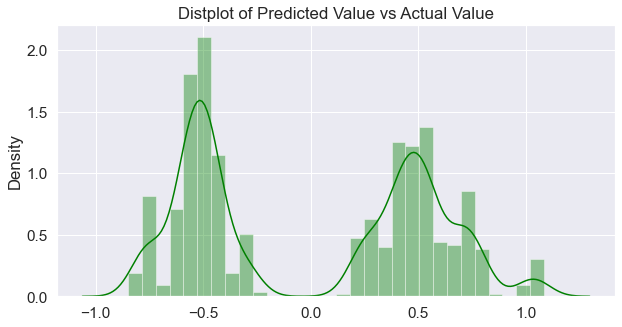

In [172]:
#Creating a distribution plot on predicted value against actual value
sns.distplot(test_Y - predict, color='green')
plt.title("Distplot of Predicted Value vs Actual Value")
plt.show()

**NOTE:-**
-  The distribution is skewed to the right showing a broken normal distribution
-  It seems that the data sets' lower bounds are extremely low relative to the rest of the data which caused the data to skew right.


***

# Insights


-	The frequent users of the rewards program are (57.2% or 8,483) males followed by the (41.3% or 6,128) females with 1.4% customers whose gender not known.
-	Senior adults aged 51 to 75 are the top users while young adults aged 18 to 25 are the least frequent users.
-	MEMBERSHIP: shows steady growth year over year. 2018 only having 6 months data seems to be the year with the highest membership by >2000 from 2017 followed by year 2017 and 2016.
-	Female users are more than their male counterparts in 2017 although males were the majority initially.
-	INCOME: customers with income group of 57k-70k and 29k-45k are the top participants in the overall income that ranges between 30k and 120k. However, the income group 29k-45k surpassed the other group in 2018.
-	GENDER: The top customers by gender and income group are males with income ranging between 55k and 85k followed by females with income range between 43k and 70k and unknown gender group with income range between 45k and 78k.
-	CHANNELS: of the 4 types of channel combinations [web, email, mobile, social] is mostly associated with the rewards while [web, email] combinations are the least used.
-	Email channel is the #1 medium used to send rewards to customers followed by mobile, social, and web.
-	DIFFICULTY: level 10 is the most popular associated with rewards.
-	DURATION: offers with duration of 5 days associated with most rewards ranging between 5&10 followed by duration 7 with rewards ranging between 3 &10 while duration 10 ranges between rewards 2&5
-	OFFER_TYPE: most rewards generated from Bogo offer type with rewards ranging between 5&10 followed by discount offer type that yields rewards between 2&3 while informational has none.
-	Bogo is the most preferred offer type by females, senior adults, age group and income group of 57k-70k.
-	EVENTS: transaction is the most popular event with 7,000 male, and senior adults with income group 29k-45k.
-	Offer_completed is the least popular event with >2,000 male, age 51-75 senior adults in the highest income group 86k-120k.

Overall, my experience working with the three datasets was interesting. I removed 2,175 records with 118 age as outliers to avoid unnecessarily crowding the datasets with missing value records in other vital attributes such as gender and income. I used OLS Regression Analysis to create the predictive model to identify the coefficients reacting most to the “response” column that mirrored the event column having numeric values (offer received:0, offer viewed:1, offer completed:2, transaction:3).


# Recommendation

The residual probability plot showed the predictive data sets weren't very far from the observed data sets, however, the model might still suffer from the problem of strong multicollinearity or other problems. I recommend investigating the model further by using other predictive variables that may influence the members' responses to understand the individual customers’ behaviors to develop the right algorithm which relates to the reward members with an efficient personalized offer. Also, the new model will help to identify which kind of offers result in completion and rewards using the right combination of communication channels. In the meantime, I recommend adding the following information to the existing datasets to analyze and create predictive models with accuracy:

-  Include locations of the Starbucks stores that participate in the rewards program as that would help to track the members' preferences that would reveal the variance in the responses to the personalized offers.

-  Having the datetime stamp in the transcript dataset would be very useful to analyze and track the ordering and purchasing habits of the members because the time of the day, month or the day of the week matters when analyzing Starbucks' products offered to the rewards program participants. 

-	Include the offer_id in the current transcript data under events. The lack of this information in the current dataset didn't allow the analysis to link the transactions to the specific offer types. In the absence of these observations, the analysis was conducted as if the customers made purchases without interacting with the offers except that these customers are members of the rewards program but there is no evidence to back it up that they're influenced by the reward offers for making the transactions.

-	Include actions like purchases made by customers in the transaction dataset because the current one shows rewards received by customers but that doesn’t show if a particular offer_completed event was associated with a purchase amount.

***

## References:
- Python Courses & Cheat Sheets from DataCamp (www.DataCamp.com)
- Cheat Sheet from DATAQUEST (www.dataquest.io)
- https://stackoverflow.com/questions/49783594/for-loop-and-zip-in-python
- https://seaborn.pydata.org/tutorial/categorical.html
- https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/
-//Code adapted from profile.age by Vishalkrishna Bhosle - (Source:https://github.com/VishalkrishnaBlaze/Starbucks-Capstone-Challenge/blob/master/Starbucks_Capstone_notebook.ipynb retrieved in April 2021.)
-//Code adapted from profile.age by Leda Duelo - (Source: https://github.com/ledaduelo/Starbukcs-Customer-segmentation/blob/main/Starbucks_Capstone_notebook.ipynb retrieved in April 2021.)
- Daniel Chen, SciPy 2019 Tutorial,https://www.youtube.com/watch?v=5rNu16O3YNE
- https://www.statology.org/linear-regression-python/
-// Image (Source: https://stories.starbucks.com/uploads/sites/17/2020/08/01-1024x1024.png retrieved in April 2021.)
- https://www.youtube.com/watch?v=RHQAe_cnjCI&t=427s

***